In [1]:
import numpy as np
import pandas as pd
from scipy import signal
from scipy.stats import zscore
from scipy.integrate import cumtrapz
import data_processing as dp
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pywt
import h5py
from nitime.algorithms import autoregressive
from sklearn.preprocessing import StandardScaler,normalize,MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor as LOF
#from sklearn.ensemble import IsolationForest
import joblib

In [172]:
import imp
imp.reload(dp)

<module 'data_processing' from 'E:\\Document\\jupyter\\Master Thesis\\data_processing.py'>

In [2]:
for dirname, _, filenames in os.walk('.\data'):
    for filename in filenames:
        depth = len(dirname.split(os.path.sep))
        if depth == 2:
            print(os.path.join(dirname,filename))

.\data\G04_FoG_trial_1_emg.csv
.\data\G04_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_1_emg.csv
.\data\G06_FoG_trial_2_emg.csv
.\data\G06_FoG_trial_3_emg.csv
.\data\G07_Freezing_Trial1_trial_1_emg.csv
.\data\G08_FoG_1_trial_1_emg.csv
.\data\G08_FoG_2_trial_1_emg.csv
.\data\G11_FoG_trial_1_emg.csv
.\data\G11_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_A_FoG_trial_3_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_1_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_2_emg.csv
.\data\P379_M050_2_OFF_B_FoG_trial_3_emg.csv
.\data\P551_M050_2_A_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_1_emg.csv
.\data\P551_M050_2_B_FoG_trial_2_emg.csv
.\data\P812_M050_2_B_FoG_trial_1_emg.csv
.\data\P812_M050_2_B_FoG_trial_2_emg.csv


In [2]:
emg_data = pd.read_csv('.\data\正常\P231_M050_B_Walking_trial_4_emg.csv')
emg_data2 = pd.read_csv('.\data\G06_FoG_trial_1_emg.csv')

In [5]:
emg_data.head()

Time  Label1  Label2  LEFT_TA  LEFT_TS  LEFT_BF  LEFT_RF  RIGHT_TA  \
0  0.000       0       0       -3        2     -4.0     -1.0       0.0   
1  0.001       0       0       -5       10      0.0     -2.0      -4.0   
2  0.002       0       0       -6       11      1.0      0.0      -4.0   
3  0.003       0       0        0       -2      0.0     -3.0      -6.0   
4  0.004       0       0        0       -8     -3.0     -3.0      -4.0   

   RIGHT_TS  RIGHT_BF  RIGHT_RF  
0       2.0       1.0      -2.0  
1       0.0      -7.0      -2.0  
2      -1.0      -2.0      -3.0  
3      -2.0      -5.0      -8.0  
4      -3.0       0.0       2.0

In [6]:
emg_data2.head()

Time  Label1  Label2  LEFT_TA  LEFT_TS  LEFT_BF  LEFT_RF  RIGHT_TA  \
0  0.000       0       0      -14       -4       -4       -1        -9   
1  0.001       0       0       -5       -4       -4       -4        -6   
2  0.002       0       0        6        0       -9        4        -6   
3  0.003       0       0       28        1       -1       -1         1   
4  0.004       0       0       43        3       -2        0         1   

   RIGHT_TS  RIGHT_BF  RIGHT_RF  
0        -2       1.0      -1.0  
1        -1       0.0       6.0  
2        -6       0.0      -2.0  
3         2      -5.0       2.0  
4         2       3.0       1.0

In [7]:
emg_data.Label2.describe()

count    23301.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Label2, dtype: float64

In [3]:
emg_data2 = emg_data2.fillna({'LEFT_TA':emg_data.RIGHT_TA.mean(),
                           'LEFT_TS':emg_data.RIGHT_TS.mean(),
                           'LEFT_BF':emg_data.LEFT_BF.mean(),
                           'LEFT_RF':emg_data.LEFT_RF.mean(),
                           'RIGHT_TA':emg_data.RIGHT_TA.mean(),
                           'RIGHT_TS':emg_data.RIGHT_TS.mean(),
                           'RIGHT_BF':emg_data.RIGHT_BF.mean(),
                           'RIGHT_RF':emg_data.RIGHT_RF.mean()})
emg_data2.isna().sum()

Time        0
Label1      0
Label2      0
LEFT_TA     0
LEFT_TS     0
LEFT_BF     0
LEFT_RF     0
RIGHT_TA    0
RIGHT_TS    0
RIGHT_BF    0
RIGHT_RF    0
dtype: int64

In [273]:
emg_data2.isna().sum()

Time        0
Label1      0
Label2      0
LEFT_TA     6
LEFT_TS     6
LEFT_BF     6
LEFT_RF     0
RIGHT_TA    0
RIGHT_TS    9
RIGHT_BF    0
RIGHT_RF    0
dtype: int64

In [2]:
df = pd.read_csv('./useful_data_label.csv',index_col=0)
df2 = pd.read_csv('./unuseful_data_label.csv',index_col=0)
df.columns

Index(['G04_FoG_trial_1_emg.csv', 'G04_FoG_trial_2_emg.csv',
       'G06_FoG_trial_1_emg.csv', 'G06_FoG_trial_2_emg.csv',
       'G06_FoG_trial_3_emg.csv', 'G07_Freezing_Trial1_trial_1_emg.csv',
       'G08_FoG_1_trial_1_emg.csv', 'G08_FoG_2_trial_1_emg.csv',
       'G11_FoG_trial_1_emg.csv', 'G11_FoG_trial_2_emg.csv',
       'P379_M050_2_OFF_A_FoG_trial_1_emg.csv',
       'P379_M050_2_OFF_A_FoG_trial_2_emg.csv',
       'P379_M050_2_OFF_A_FoG_trial_3_emg.csv',
       'P379_M050_2_OFF_B_FoG_trial_1_emg.csv',
       'P379_M050_2_OFF_B_FoG_trial_2_emg.csv',
       'P379_M050_2_OFF_B_FoG_trial_3_emg.csv',
       'P551_M050_2_A_FoG_trial_1_emg.csv',
       'P551_M050_2_B_FoG_trial_1_emg.csv',
       'P551_M050_2_B_FoG_trial_2_emg.csv',
       'P812_M050_2_B_FoG_trial_1_emg.csv',
       'P812_M050_2_B_FoG_trial_2_emg.csv'],
      dtype='object')

In [436]:
data.LEFT_TA.mean()

-0.2232123066010551

In [4]:
df2.columns[4]
pd.read_csv('./data/'+df.columns[0]).isna().sum()

Time            0
Label1          0
Label2          0
LEFT_TA        15
LEFT_TS        24
LEFT_BF         6
LEFT_RF         0
RIGHT_TA    56212
RIGHT_TS    56272
RIGHT_BF      102
RIGHT_RF       95
dtype: int64

{0, 1, 2, 3}


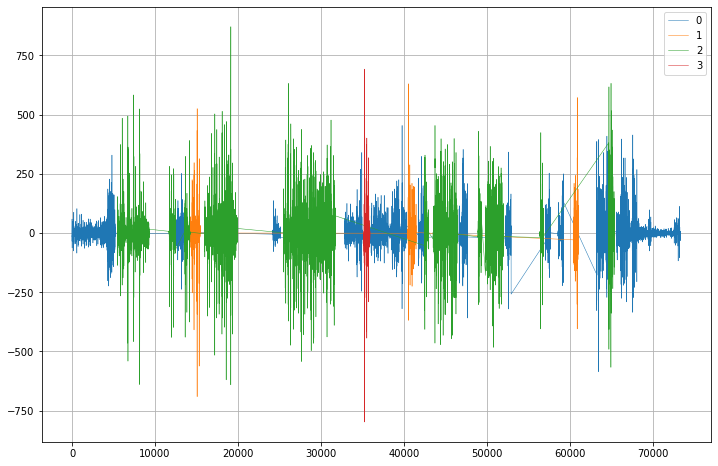

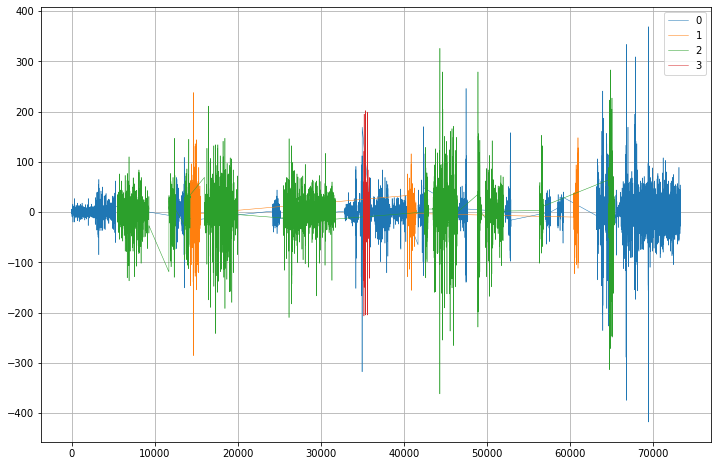

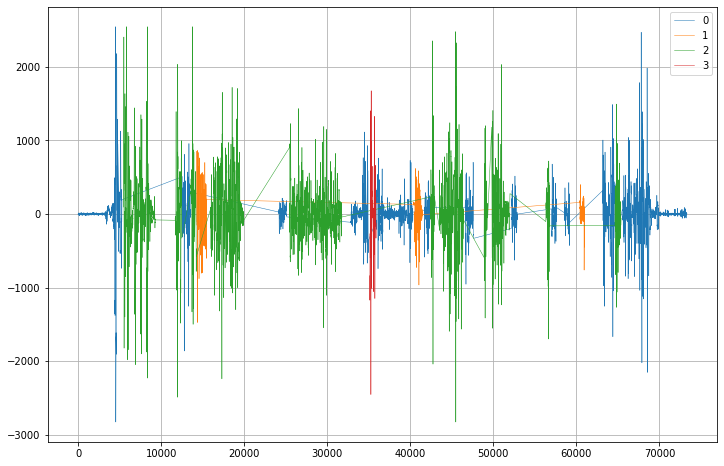

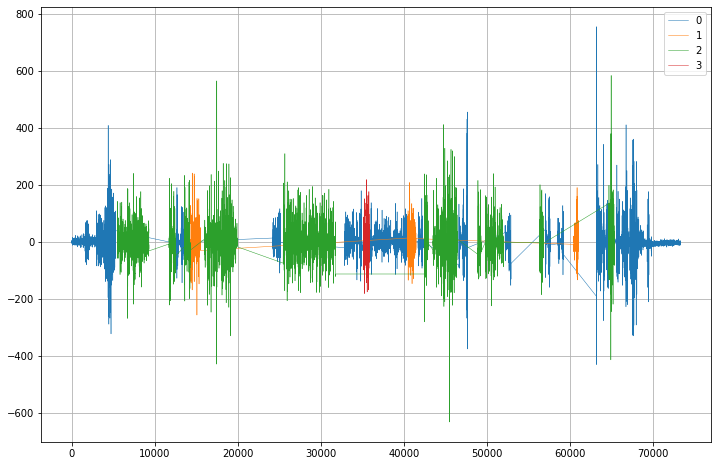

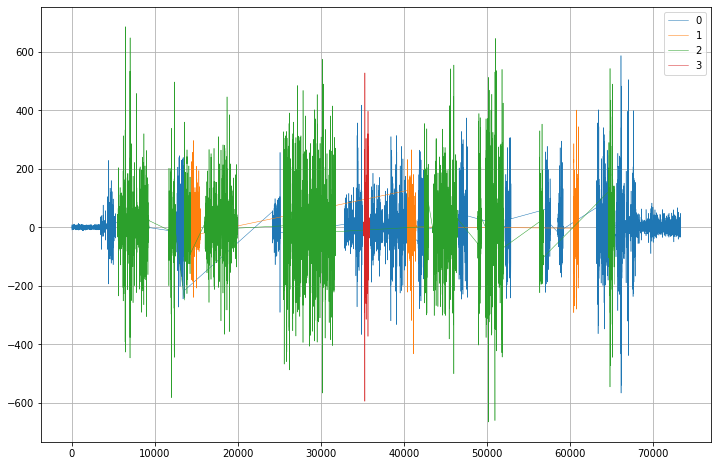

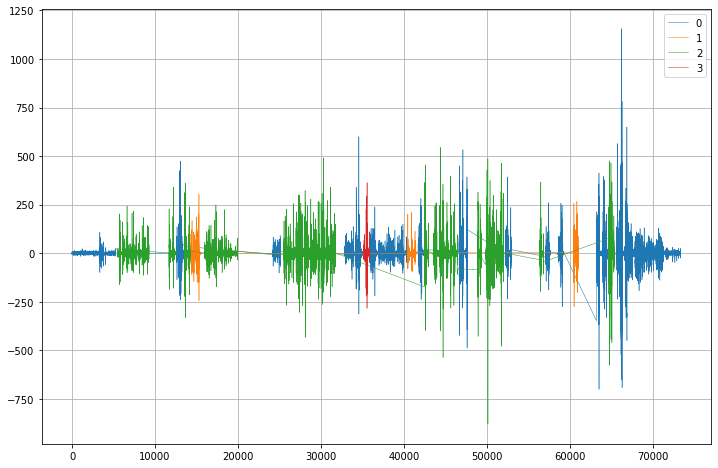

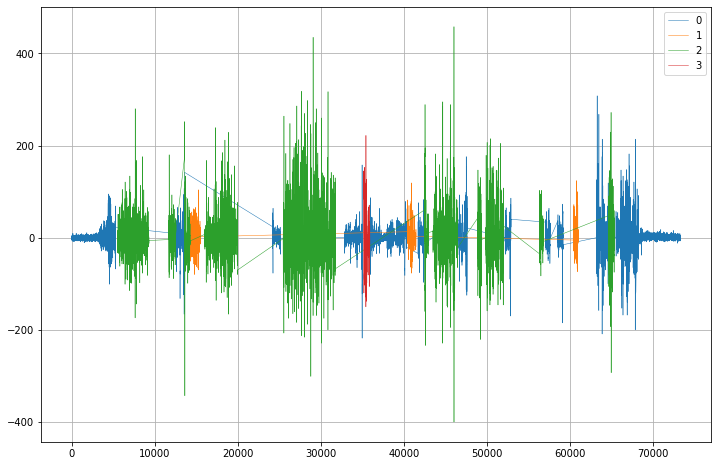

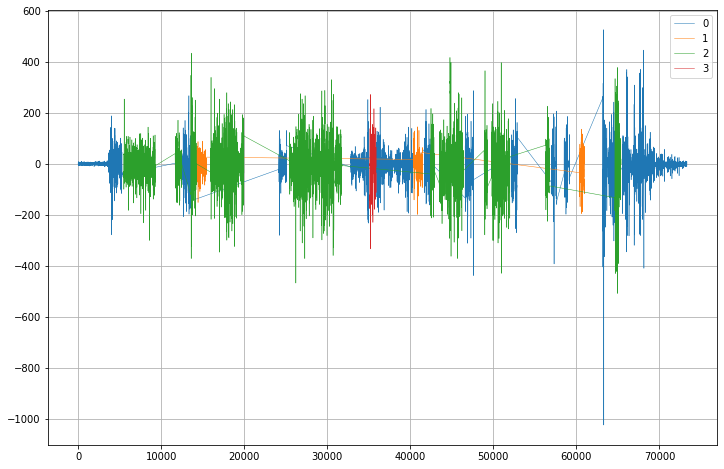

In [3]:
#data = pd.read_csv('./data/'+df.columns[5])
data = pd.read_csv('./data/'+df.columns[20])
"""data = data.fillna({'LEFT_TA':data.LEFT_TA.mean(),
                           'LEFT_TS':data.LEFT_TS.mean(),
                           'LEFT_BF':data.LEFT_BF.mean(),
                           'LEFT_RF':data.LEFT_RF.mean(),
                           'RIGHT_TA':data.RIGHT_TA.mean(),
                           'RIGHT_TS':data.RIGHT_TS.mean(),
                           'RIGHT_BF':data.RIGHT_BF.mean(),
                           'RIGHT_RF':data.RIGHT_RF.mean()})"""
data = data.dropna()
print(set(data.Label2))
fn = 20
wn=2*fn/1000
fn1 = 300
wn1=2*fn1/1000
#b, a = signal.butter(4, [wn,wn1], 'bandpass')
b, a = signal.butter(4, [wn], 'highpass')
#x_filter = signal.filtfilt(b, a, x[1,:,1])
sc = StandardScaler(with_mean=False)
#scs = []
m = 0
#x_filter = sc.fit_transform(np.array(data.iloc[:,3:]))
#data.iloc[:,3:] = sc.fit_transform(data.iloc[:,3:])
#data.iloc[:,3:] = normalize(data.iloc[:,3:])
for i in data.columns[3:]:
    plt.figure(figsize=(12,8))
    #data.iloc[:,3:] = normalize(data.iloc[:,3:])
    #ind = abs(zscore(data.loc[:,i]))<10
    #data.loc[~ind,i] = data.loc[ind,i].mean()
    #ind = (lof.fit_predict(np.array(data.loc[:,i])[:,np.newaxis]))==1
    #data.loc[~ind,i] = data.loc[ind,i].mean()
    x_filter = signal.filtfilt(b, a, data.loc[:,i])
    #ind = abs(zscore(x_filter))<10
    #x_filter[~ind]=x_filter[ind].mean()
    #ind = (lof.fit_predict(x_filter[:,np.newaxis]))==1
    #x_filter[~ind] = x_filter[ind].mean()
    #x_filter = sc.fit_transform(np.array(data.loc[:,i])[:,np.newaxis])
    #sc = joblib.load('./model/scalar%d'%m)
    #x_filter = sc.transform(np.array(data.loc[:,i])[:,np.newaxis])
    m += 1
    #scs += [sc]
    #data.loc[:20000,i].plot(linewidth=0.5)
    #sns.lineplot(data.Time[:20000],x_filter[:20000],linewidth=0.3)
    for j in set(data.Label2):
        ind = (data.Label2 == j) & (data.Label1 == j)
        data.loc[ind,i].plot(linewidth=0.5)
        #sns.lineplot(data.Time[ind],x_filter[ind],linewidth=0.3)
        #plt.ylim((-200,200))
        #plt.xlim((10000,11000))
        plt.grid(True)
        #sns.scatterplot(data.Time[ind],data.loc[ind,i],markers='.',alpha=0.5,size=0.1)
    plt.legend(set(data.Label2))

In [120]:
data

Time  Label1  Label2  LEFT_TA  LEFT_TS  LEFT_BF  LEFT_RF  RIGHT_TA  \
0         0.000       0       0        1       -4      -21       -7      -3.0   
1         0.001       0       0        3       -2      -19      -10       1.0   
2         0.002       0       0       -5       -3      -21       -7       0.0   
3         0.003       0       0       -9        8        2       -7       3.0   
4         0.004       0       0       -7        4       15        2      -2.0   
...         ...     ...     ...      ...      ...      ...      ...       ...   
362286  362.286       0       0      -12       -2       67       51       6.0   
362287  362.287       0       0      -20       -3       72       99       5.0   
362288  362.288       0       0      -18        0       60      151       4.0   
362289  362.289       0       0      -18        0       44      149       0.0   
362290  362.290       0       0      -16        0       17      118       6.0   

        RIGHT_TS  RIGHT_BF  RIGHT_RF  
0            1.0         1        10  
1            6.0         2         5  
2           -1.0         0         1  
3           -1.0         0        -2  
4            5.0        -2         4  
...          ...       ...       ...  
362286       0.0         3         9  
362287       6.0         4        12  
362288       4.0         7        12  
362289       6.0         6        14  
362290       5.0        10        12  

[362273 rows x 11 columns]

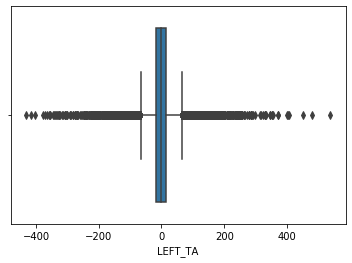

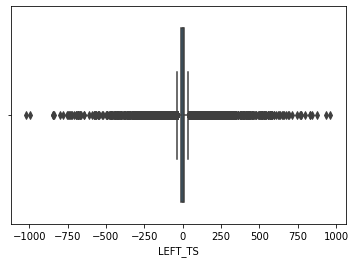

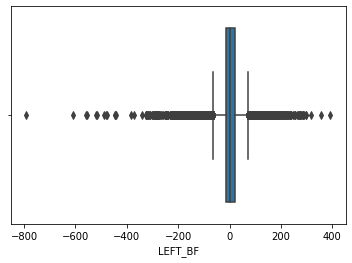

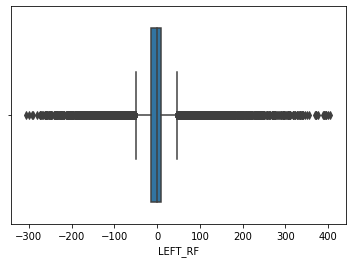

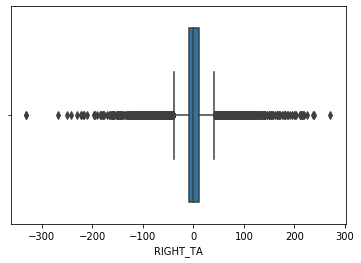

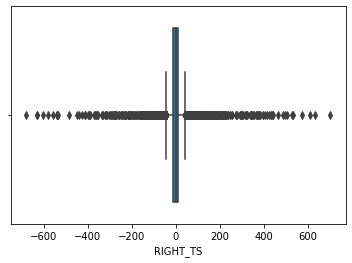

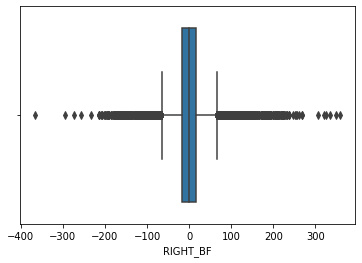

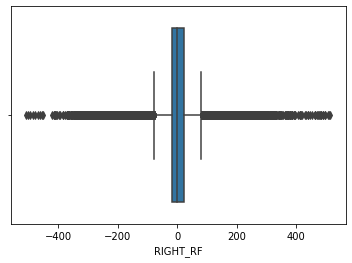

In [420]:
#sns.boxplot(np.clip(data.iloc[:,3],-300,300))
for i in range(8):
    plt.figure()
    sns.boxplot(data.iloc[:,3+i])
    #x_filter = signal.filtfilt(b, a, data.iloc[:,i+3])
    #x_filter = signal.filtfilt(b1, a1, x_filter)
    #ind = abs(zscore(x_filter))<10
    #sns.boxplot(x_filter[ind])

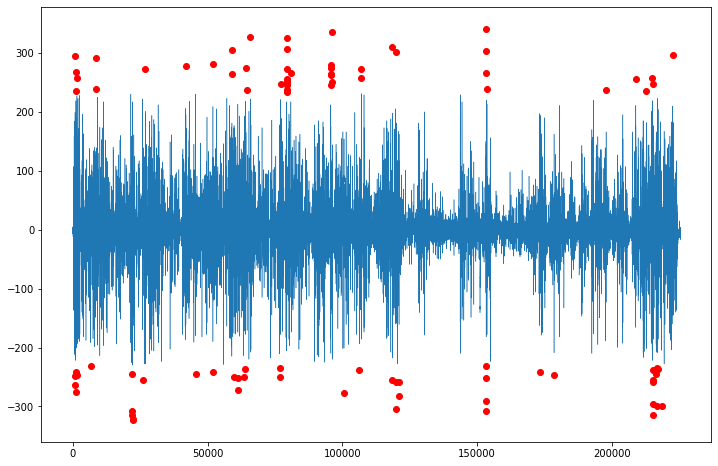

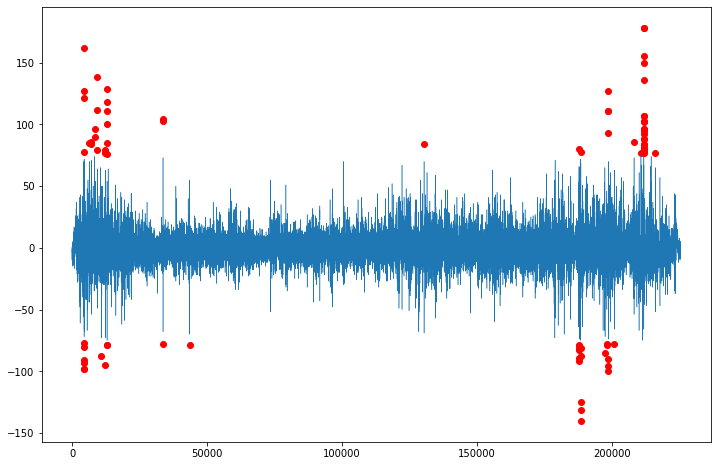

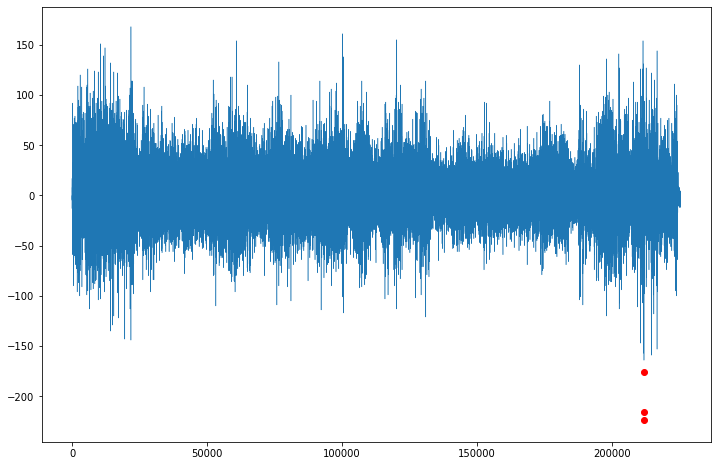

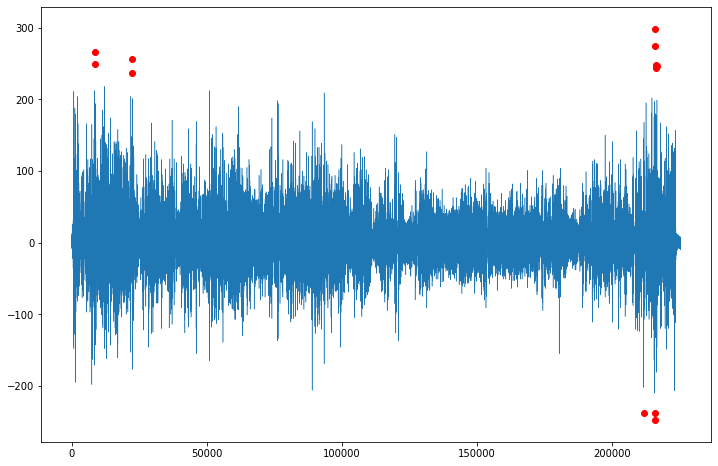

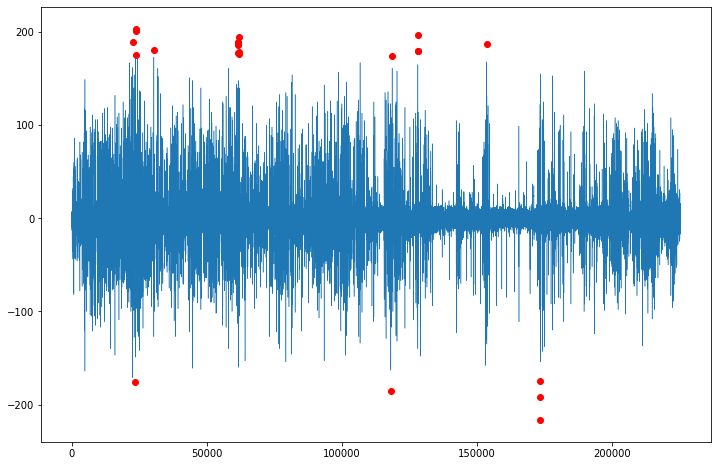

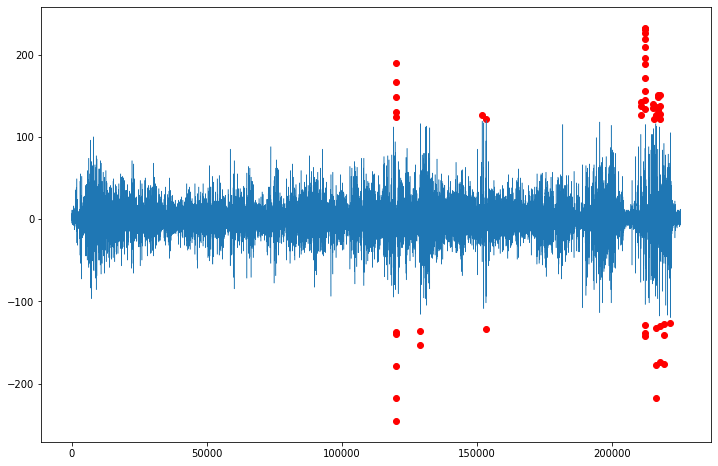

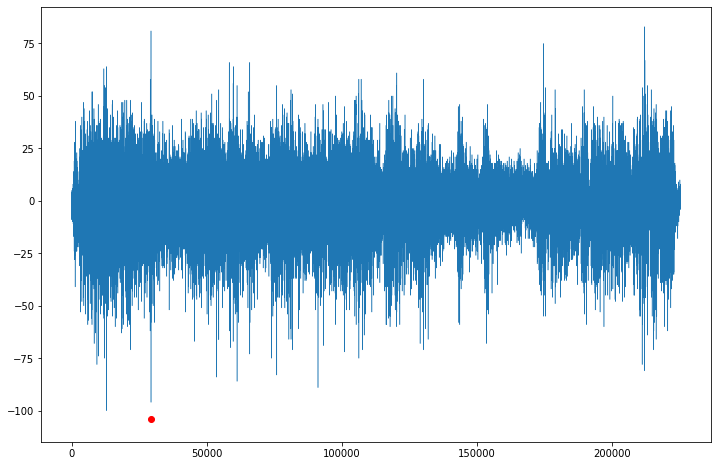

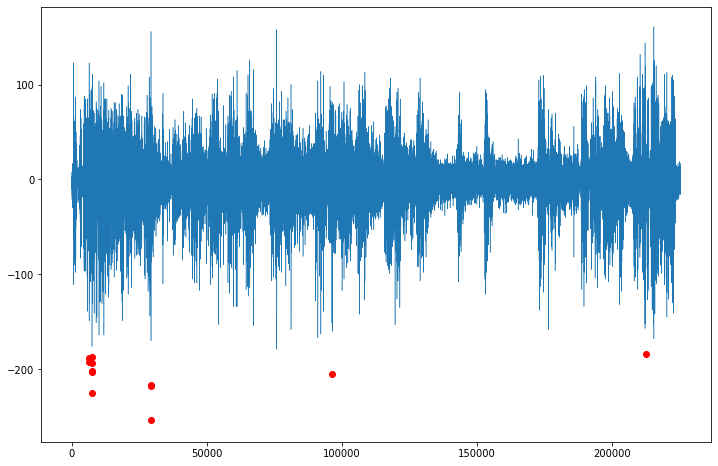

In [6]:
#lof = LOF(n_neighbors=5,metric='minkowski')
#ind = (lof.fit_predict(np.array(data.iloc[:,7])[:,np.newaxis]))==1

for i in range(8):
    ind = abs(zscore(data.iloc[:,i+3]))<10
    #ind = (lof.fit_predict(np.array(data.iloc[:,i+3])[:,np.newaxis]))==1
    plt.figure(figsize=(12,8))
    data.loc[ind,data.columns[i+3]].plot(linewidth=0.5)
    #data.loc[~ind,'LEFT_TA'].plot(linewidth=0.5)
    plt.scatter(x=data.index[~ind],y=data.loc[~ind,data.columns[i+3]],color='r')

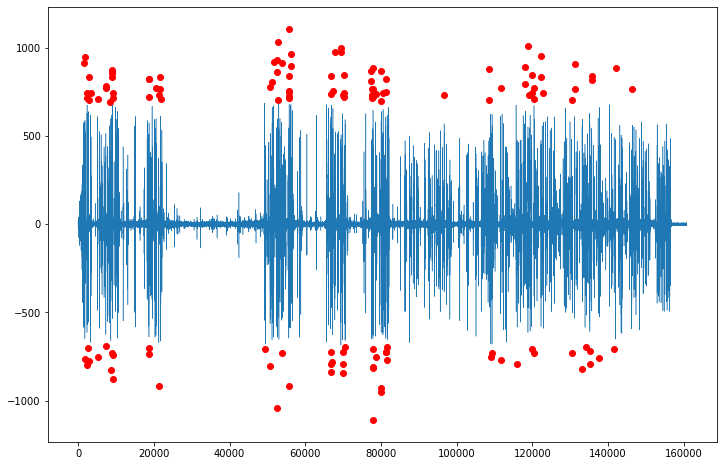

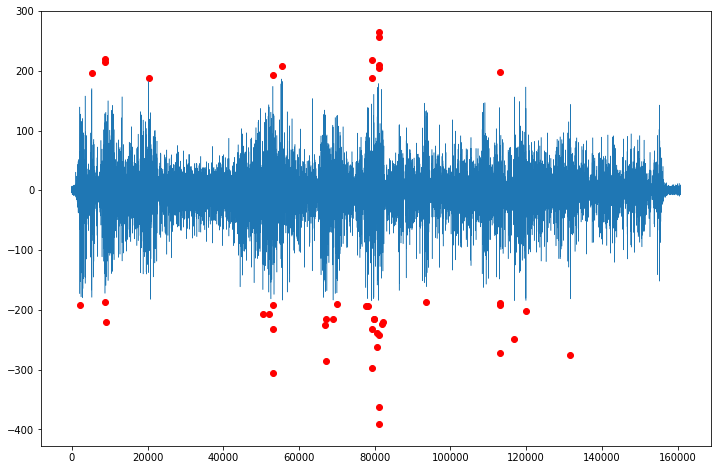

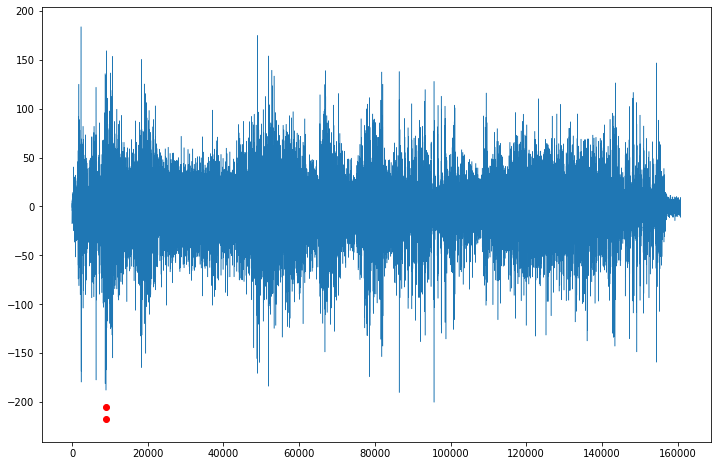

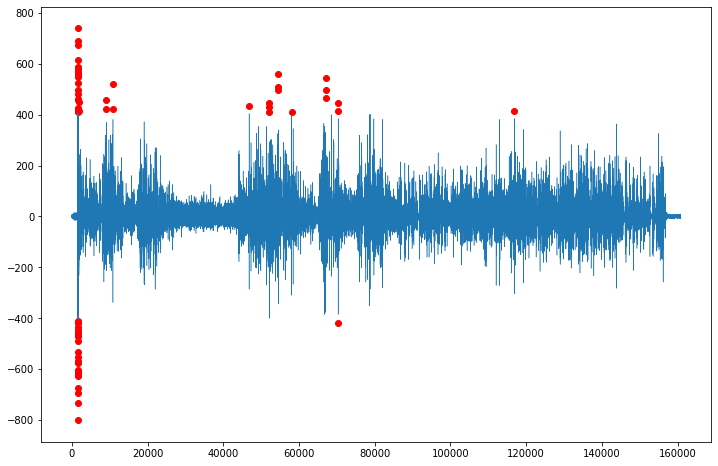

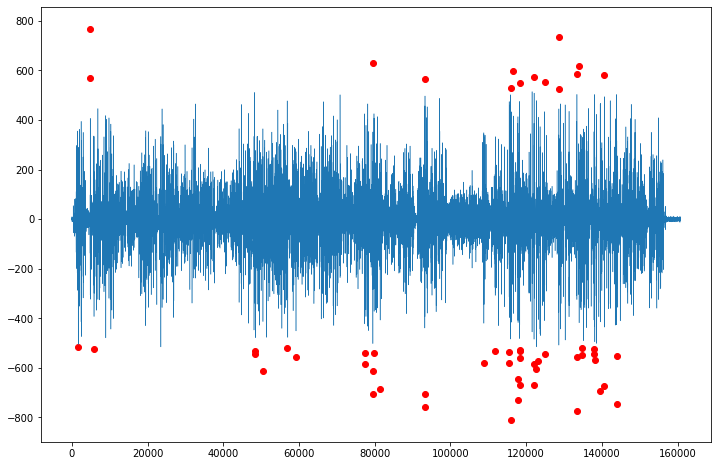

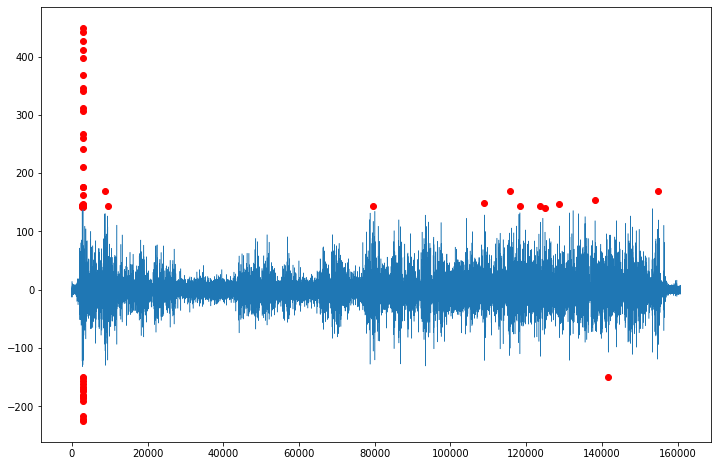

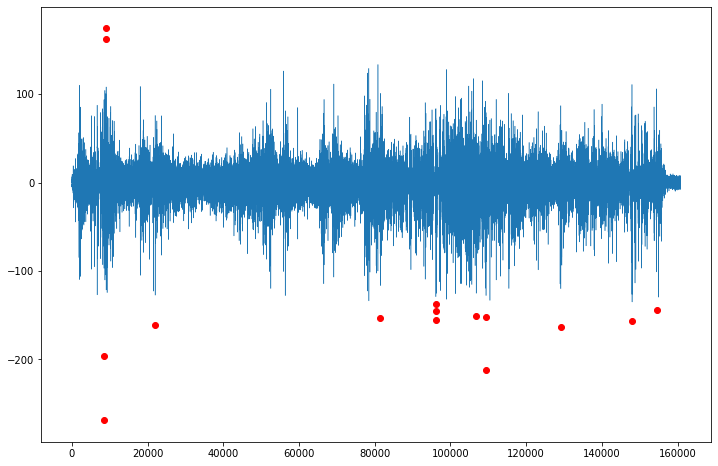

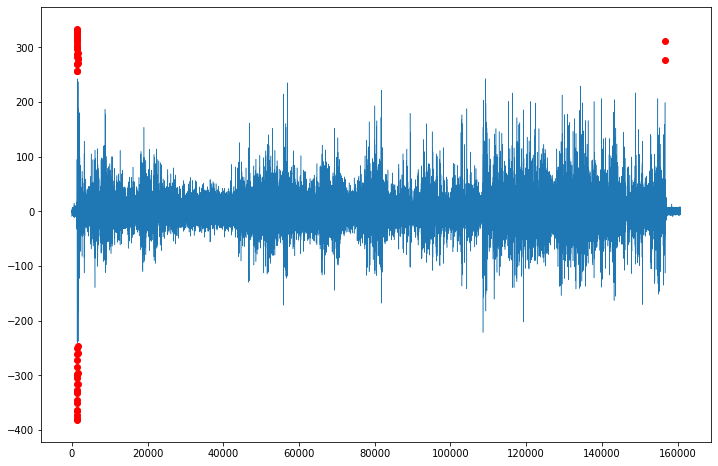

In [37]:
fs = 1000.0  # Sample frequency (Hz)
f0 = 50  # Frequency to be removed from signal (Hz)
Q = 100.0  # Quality factor
# Design notch filter
b1, a1 = signal.iirnotch(f0, Q, fs)
for i in range(8):
    x_filter = signal.filtfilt(b, a, data.iloc[:,i+3])
    #x_filter = signal.filtfilt(b1, a1, x_filter)
    plt.figure(figsize=(12,8))
    ind = abs(zscore(x_filter))<10
    #ind = (lof.fit_predict(x_filter[:,np.newaxis]))==1
    plt.plot(data.index[ind],x_filter[ind],linewidth=0.5)
    plt.scatter(data.index[~ind],x_filter[~ind],color='r')
    #x_filter[~ind]=x_filter[ind].mean()

In [128]:
ind=clf.fit_predict(np.array(data.iloc[:,7])[:,np.newaxis])

In [130]:
set(ind)

{-1, 1}

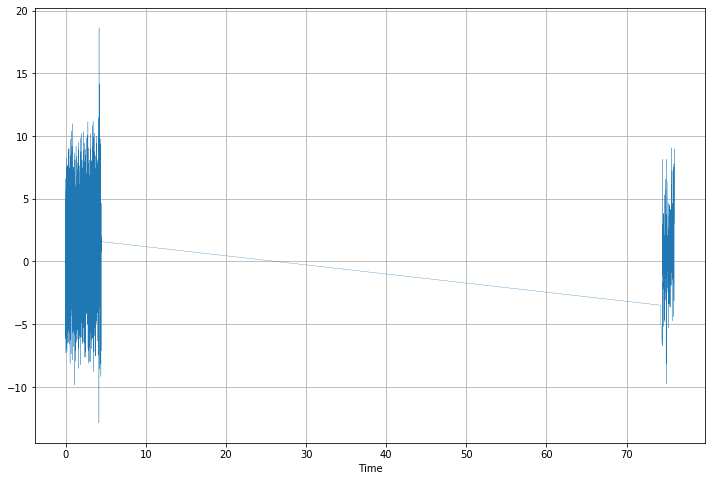

In [170]:
fs = 1000.0  # Sample frequency (Hz)
f0 = 9.5  # Frequency to be removed from signal (Hz)
Q = 100.0  # Quality factor
# Design notch filter
#b, a = signal.iirnotch(f0, Q, fs)
fn = 5
wn=2*fn/1000
fn1= 10
wn1=2*fn1/1000
b, a = signal.butter(4, [wn,wn1], 'bandpass')
temp = signal.filtfilt(b,a,data.iloc[:,5])
plt.figure(figsize=(12,8))
for j in set(data.Label2):
    ind = data.Label2 == j
    sns.lineplot(data.Time[ind],temp[ind],linewidth=0.3)
    #plt.ylim((-200,200))
    #plt.xlim((35,40))
    plt.grid(True)

5.6945986731585085


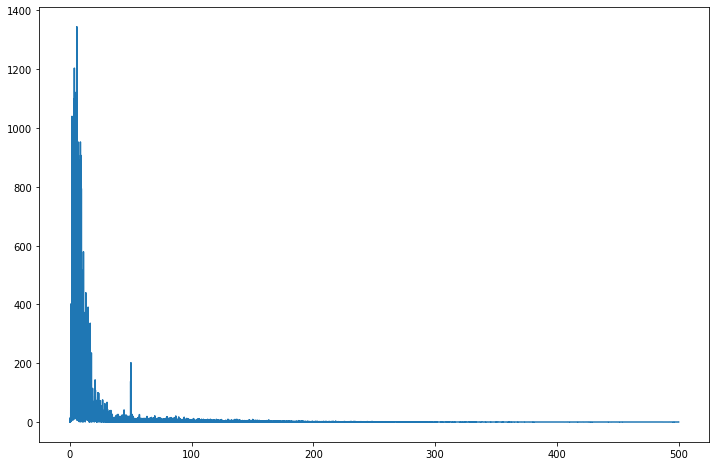

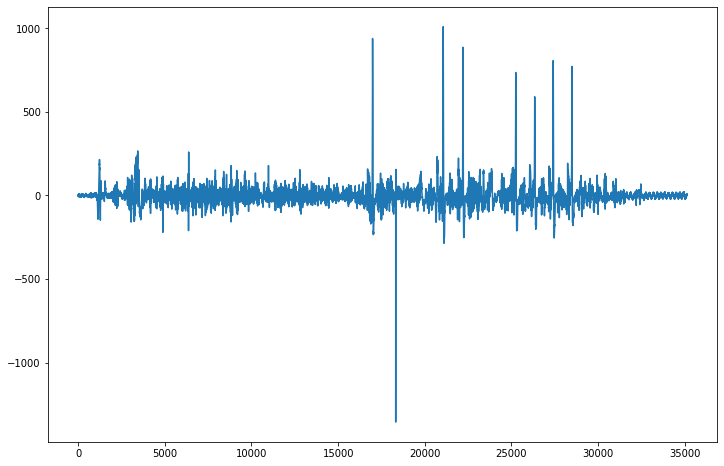

In [235]:
fs = 1000.0  # Sample frequency (Hz)
f0 = 4.58  # Frequency to be removed from signal (Hz)
Q = 100.0  # Quality factor
b, a = signal.iirnotch(f0, Q, fs)
temp = signal.filtfilt(b,a,data.iloc[:,2+7])
plt.figure(figsize=(12,8))
#freqs, power=signal.periodogram(np.clip(data.iloc[:,2+7],-200,200), 1e3)
freqs, power=signal.periodogram(temp, 1e3)
plt.plot(freqs,power)
plt.figure(figsize=(12,8))
#plt.plot((np.clip(data.iloc[:,2+7],-200,200)))
plt.plot(temp)
print(freqs[np.argmax(power)])

In [57]:
data.iloc[:,3:] = normalize(data.iloc[:,3:])

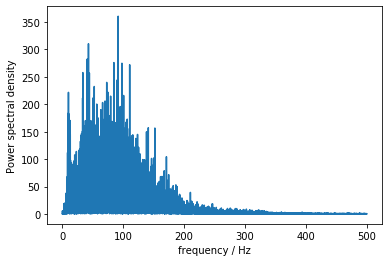

91.60839160839161


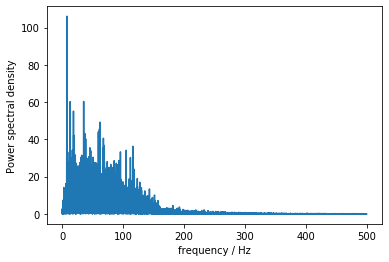

7.604895104895106


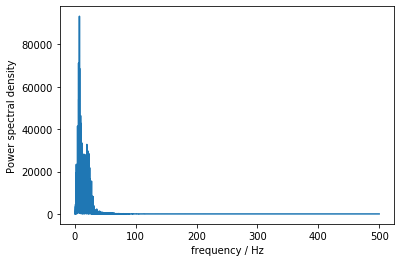

7.604895104895106


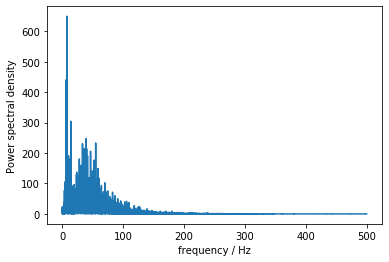

7.648601398601399


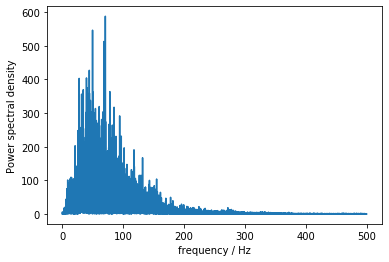

70.71678321678323


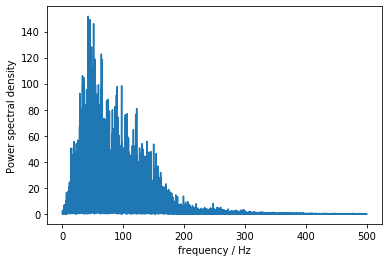

42.176573426573434


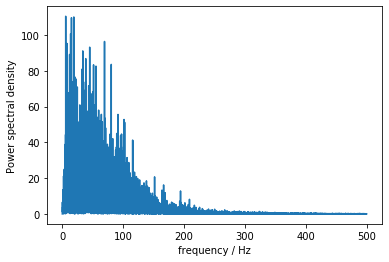

5.594405594405595


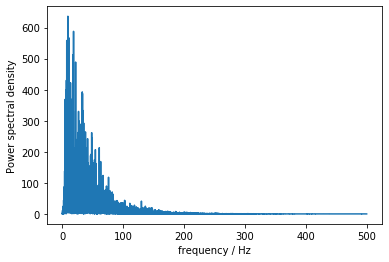

9.17832167832168


In [4]:
label = 2
label2 = 6
ind = (data.Label2 == label) & (data.Label1 == label)
ind2 = (data.Label2 == label2) & (data.Label1 == label2)
fn= 10
wn=2*fn/1000
b, a = signal.butter(4, wn, 'highpass')
for i in np.arange(3,11):
    plt.figure()
    freqs, power=signal.periodogram(data.loc[ind,data.columns[i]], 1e3)
    #freqs2, power2=signal.periodogram(data.loc[ind2,data.columns[i]], 1e3)
    #ind = (lof.fit_predict(np.array(data.iloc[:,i])[:,np.newaxis]))==1
    #data.loc[~ind,data.columns[i]]=data.loc[ind,data.columns[i]].mean()
    #freqs, power=signal.periodogram(data.iloc[:,i], 1e3)
    #x_filter = signal.filtfilt(b, a, data.loc[:,data.columns[i]])
    #x_filter = signal.filtfilt(b1, a1, x_filter)
    #ind = abs(zscore(x_filter))<10
    #ind = (lof.fit_predict(np.array(x_filter)[:,np.newaxis]))==1
    
    #x_filter[~ind]=np.mean(x_filter[ind])
    #freqs, power=signal.periodogram(x_filter, 1e3)
    plt.plot(freqs,power)
    #plt.plot(freqs2,power2,alpha=0.5)
    plt.xlabel('frequency / Hz')
    plt.ylabel('Power spectral density')
    plt.show()
    print(freqs[np.argmax(power)])

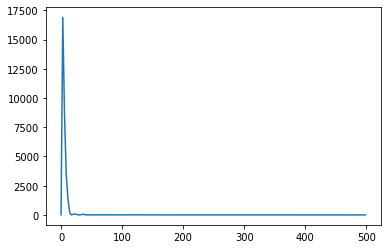

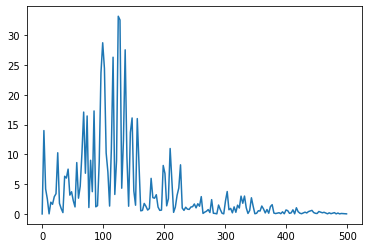

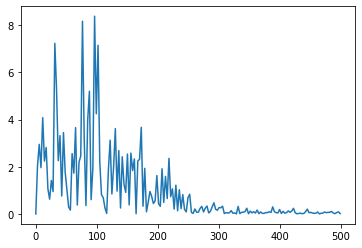

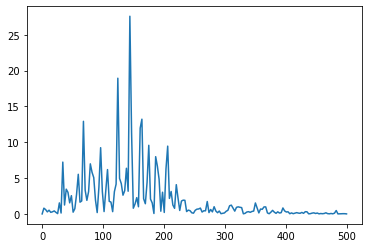

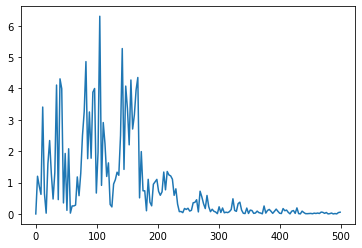

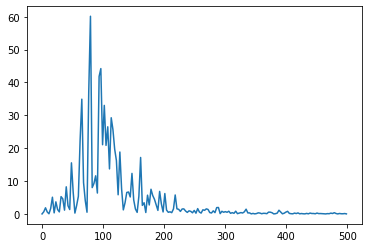

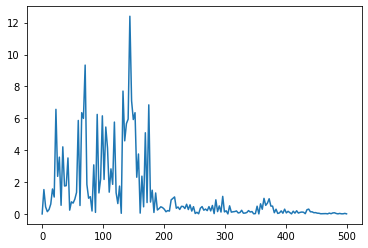

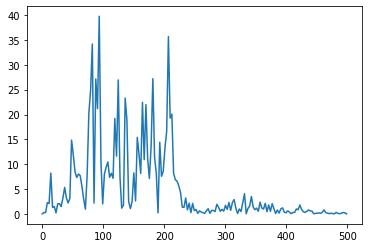

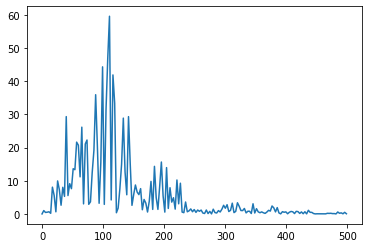

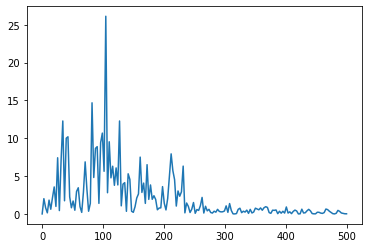

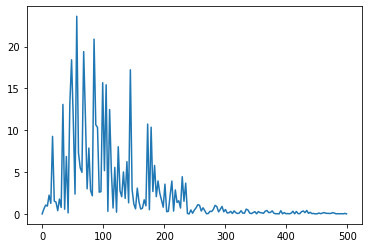

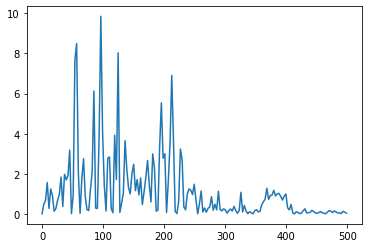

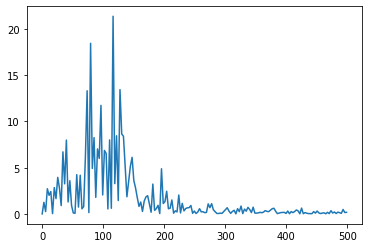

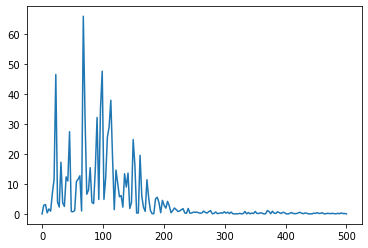

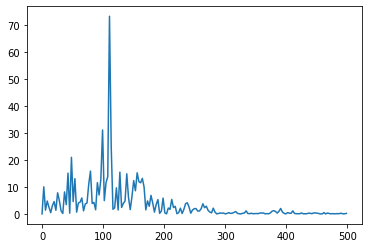

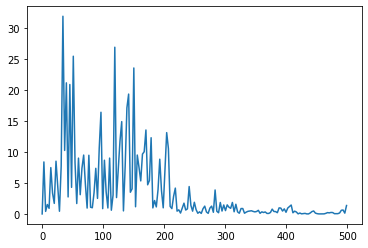

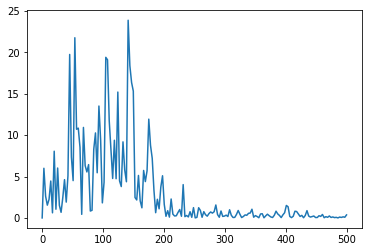

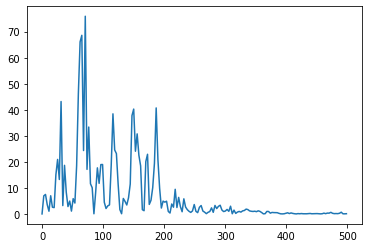

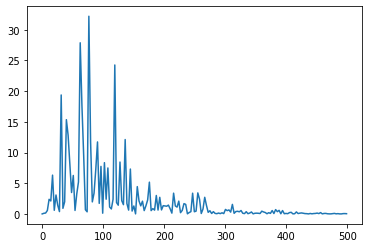

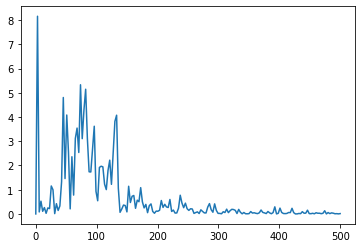

In [191]:
#label = 1
ind = (data.Label2 == label) & (data.Label1 == label)
x_filter = signal.filtfilt(b1, a1, data.loc[ind,data.columns[3+1]])
#x_filter = signal.filtfilt(b1, a1, x_filter)
#ind = abs(zscore(x_filter))<10
#x_filter[~ind]=np.median(x_filter[ind])
l = len(x_filter)
for i in range(20):
    freqs, power=signal.periodogram(x_filter[i*l//20:(i+1)*l//20], 1e3)
    plt.figure()
    plt.plot(freqs,power)

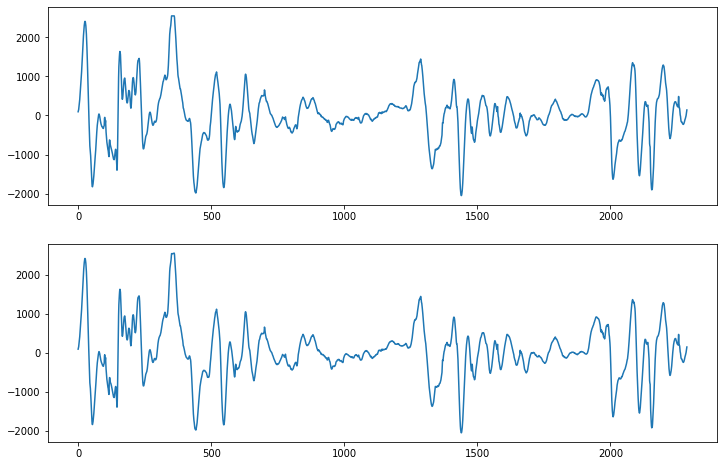

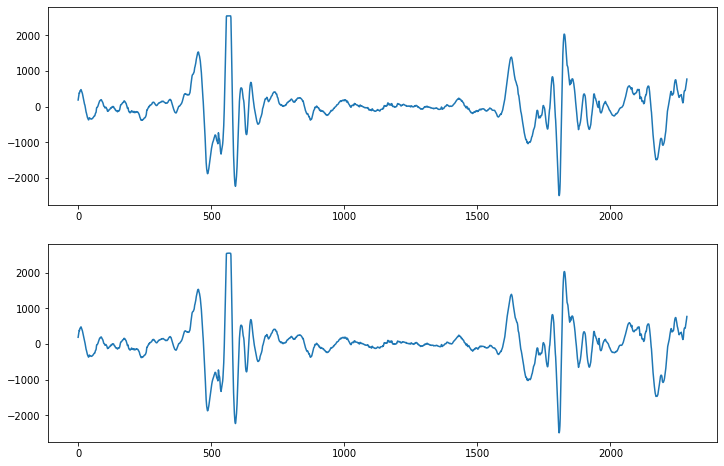

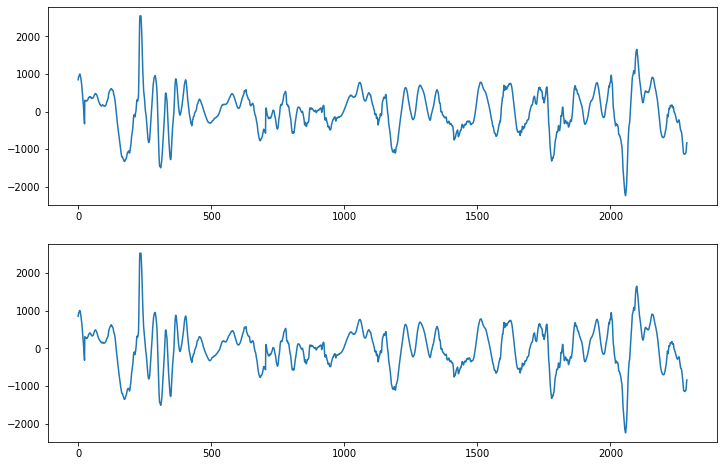

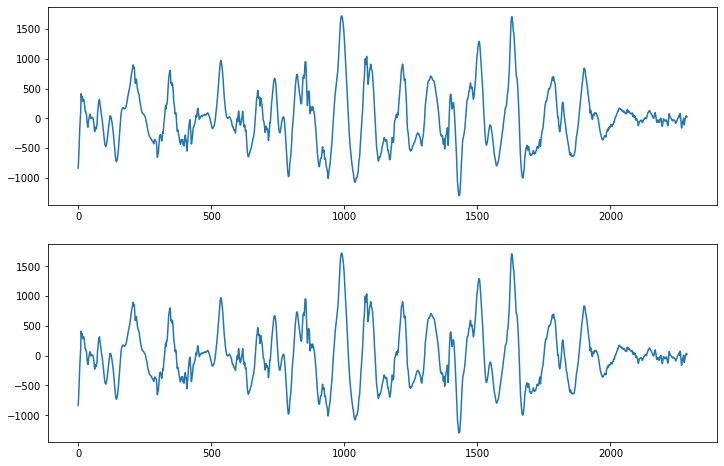

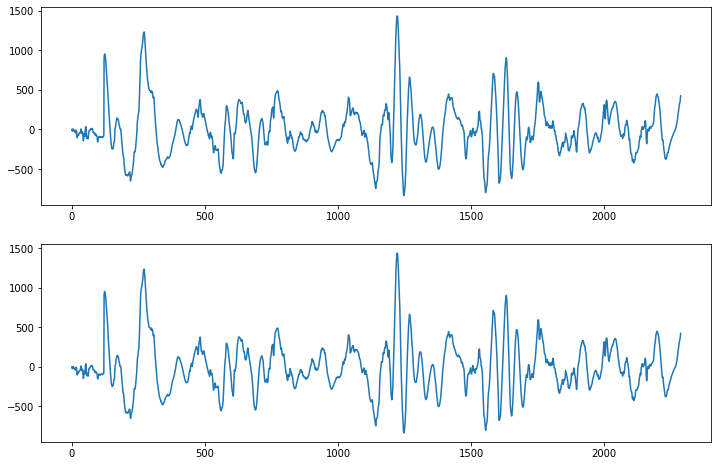

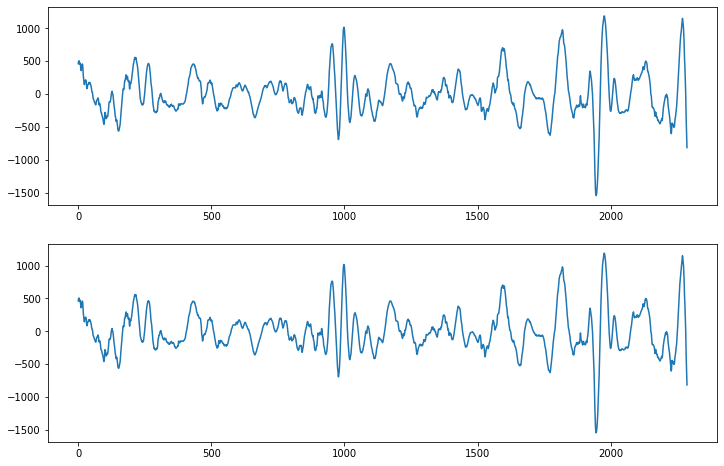

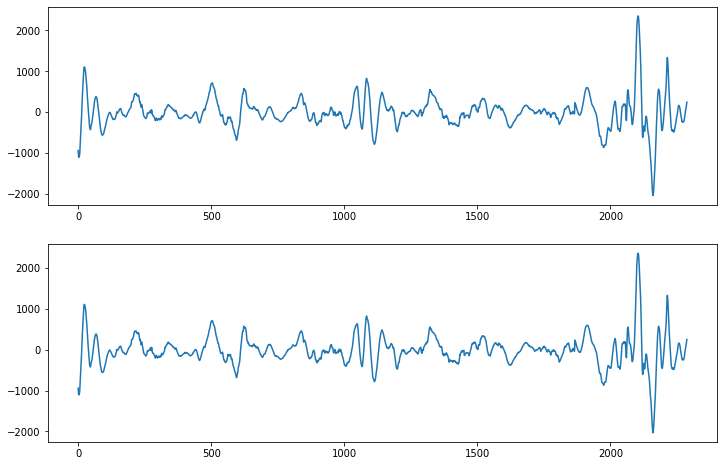

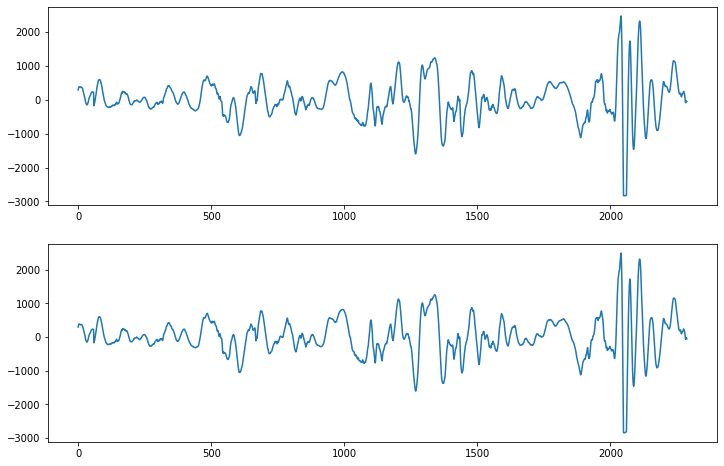

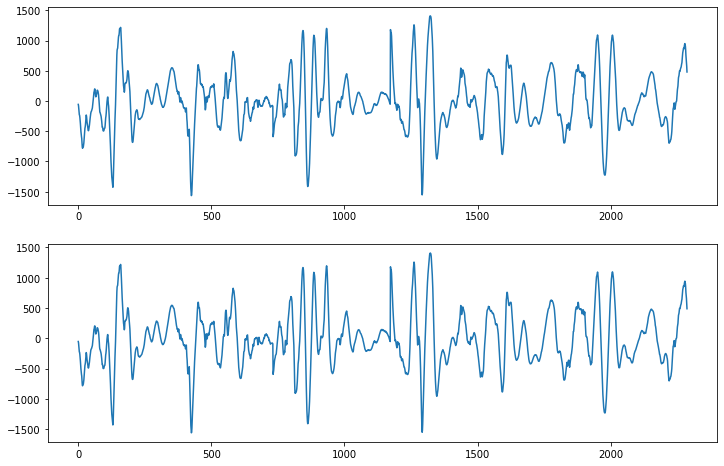

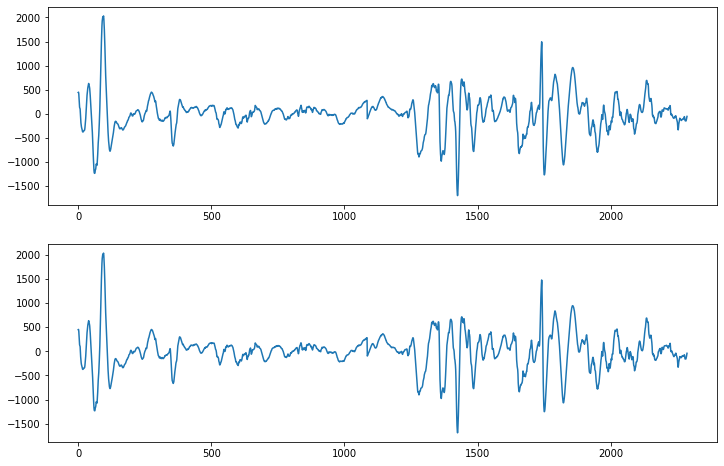

In [10]:
#label = 2
ind = (data.Label1==label) & (data.Label2==label)
data2 = data[ind]
l=len(data2)
#sc = StandardScaler()
k = 3+2
N = 10
fn= 5
wn=2*fn/1000
b, a = signal.butter(4, wn, 'highpass')

fs = 1000.0  # Sample frequency (Hz)
f0 = 50  # Frequency to be removed from signal (Hz)
Q = 100.0  # Quality factor
# Design notch filter
b1, a1 = signal.iirnotch(f0, Q, fs)

for i in range(N):
    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1)
    #data.iloc[i*10000:(i+1)*10000,7].plot(linewidth=0.5)
    temp = np.array(data2.iloc[i*l//N:(i+1)*l//N,k])
    #temp = np.clip(data.iloc[i*l/5:(i+1)*l/5,7],-500,500)
    #plt.plot(sc.fit_transform(temp)[:,0])
    plt.plot(temp)
    plt.subplot(2,1,2)
    #x_filter = signal.filtfilt(b, a, data.iloc[:,k])
    #x_filter = signal.filtfilt(b1, a1, x_filter)
    #ind = abs(zscore(x_filter))<5
    #x_filter[~ind]=np.mean(x_filter[ind])
    #temp = np.array(x_filter[i*l//N:(i+1)*l//N])
    plt.plot(signal.filtfilt(b1, a1, temp))
    #plt.ylim((-500,500))
    #plt.plot(temp[i*10000:(i+1)*10000])

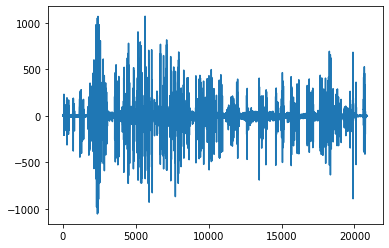

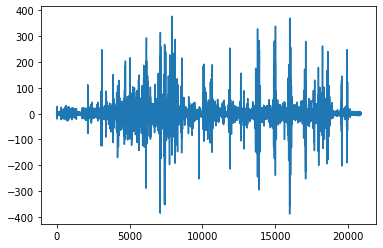

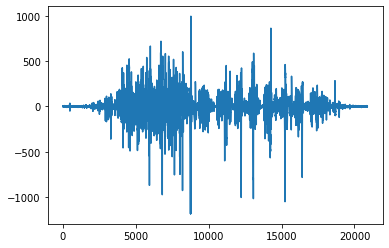

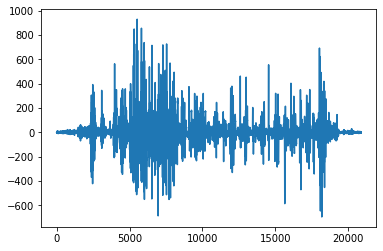

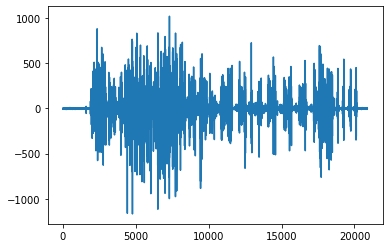

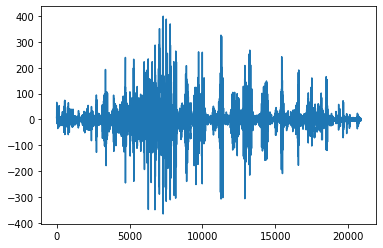

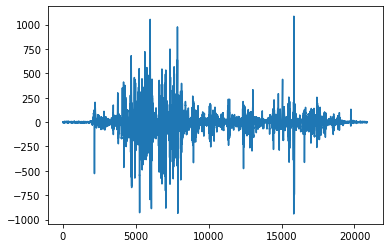

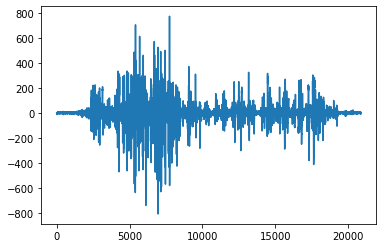

In [163]:
#temp = sc.fit_transform(data.iloc[:,3:])
for i in np.arange(3,11):
    plt.figure()
    #freqs, power=signal.periodogram(signal.filtfilt(b, a, np.clip(data.loc[:,data.columns[i]],-500,500)), 1e3)
    #freqs, power=signal.periodogram(data.iloc[:,i], 1e3)
    x_filter = signal.filtfilt(b, a, data.loc[:,data.columns[i]])
    #x_filter = signal.filtfilt(b1, a1, x_filter)
    ind = abs(zscore(x_filter))<10
    x_filter[~ind]=np.median(x_filter[ind])
    #x_filter = sc.fit_transform(x_filter[:,np.newaxis])
    plt.plot(x_filter)

    plt.show()

In [66]:
set(data.Label2)
'%f'%freqs[ind2]

'61.230260'

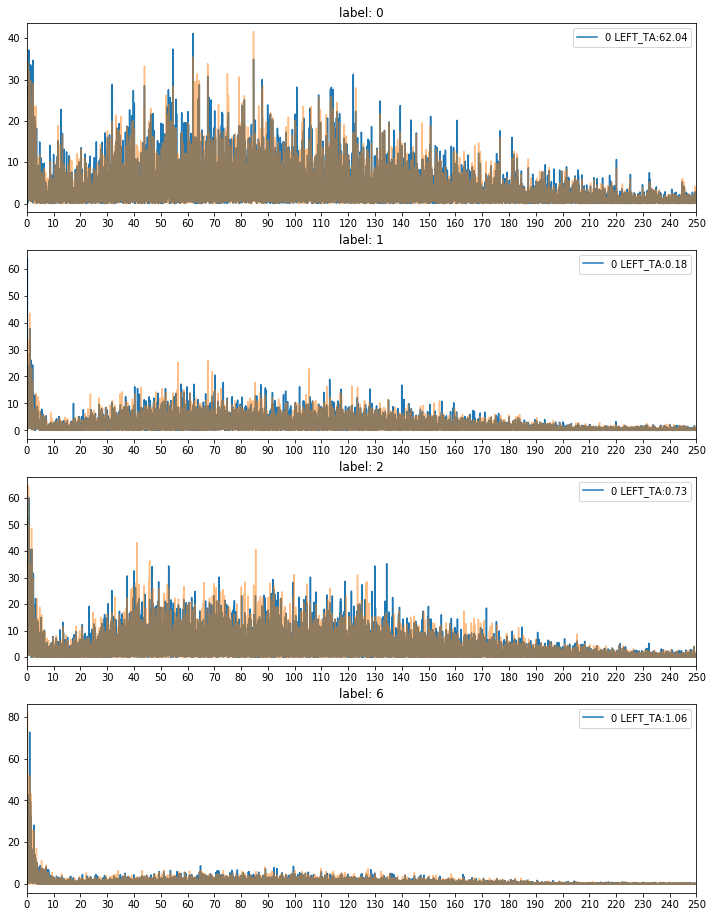

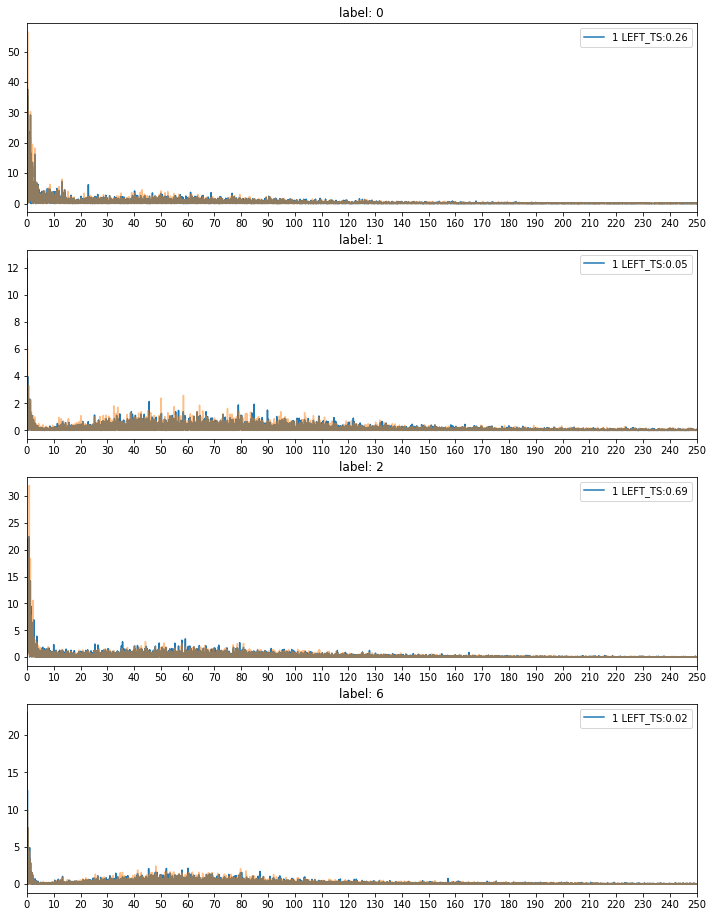

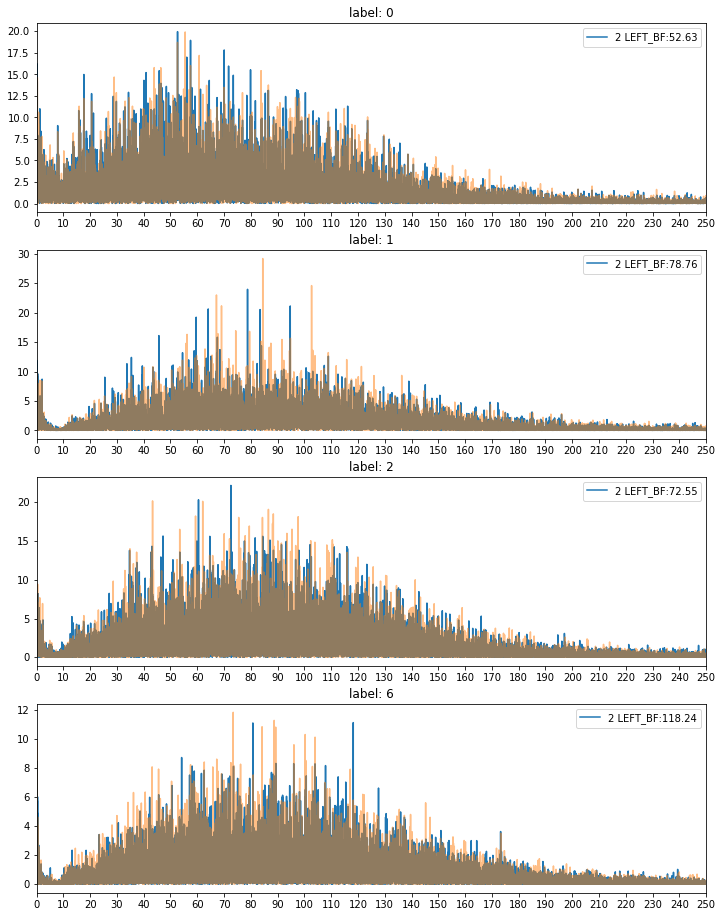

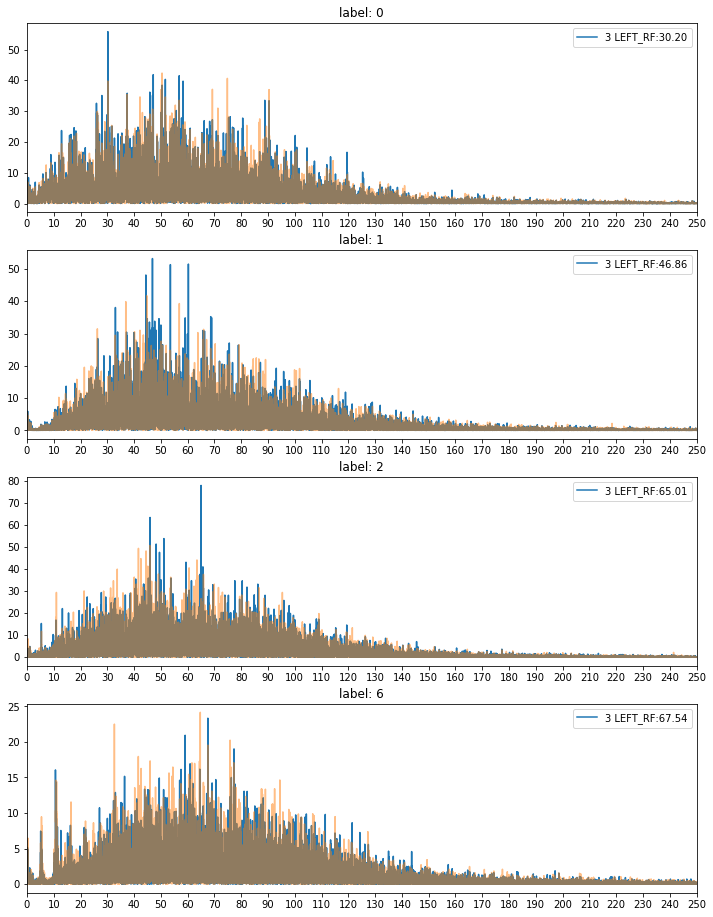

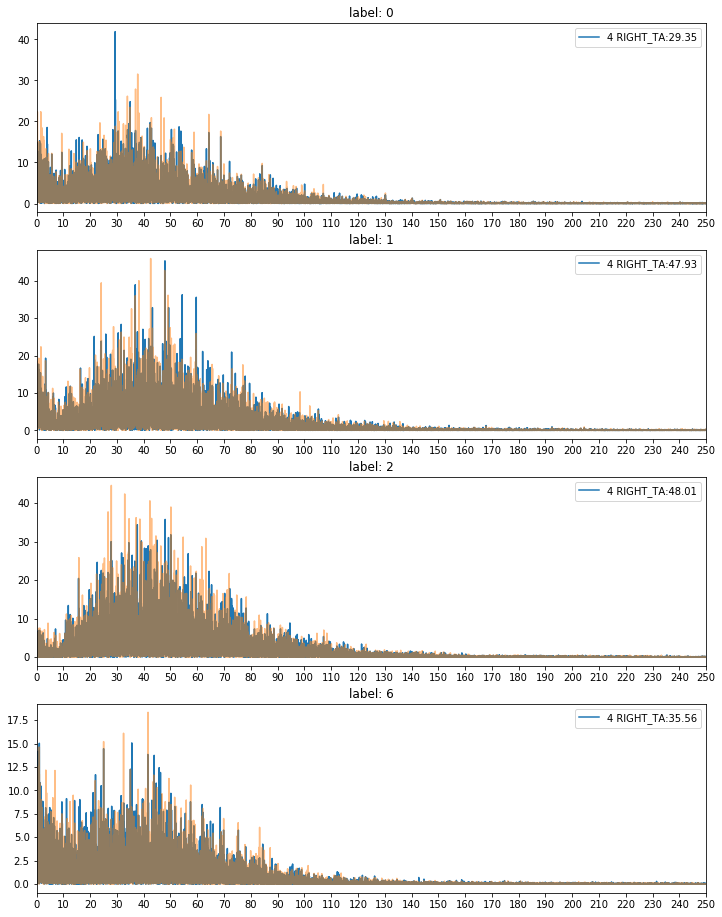

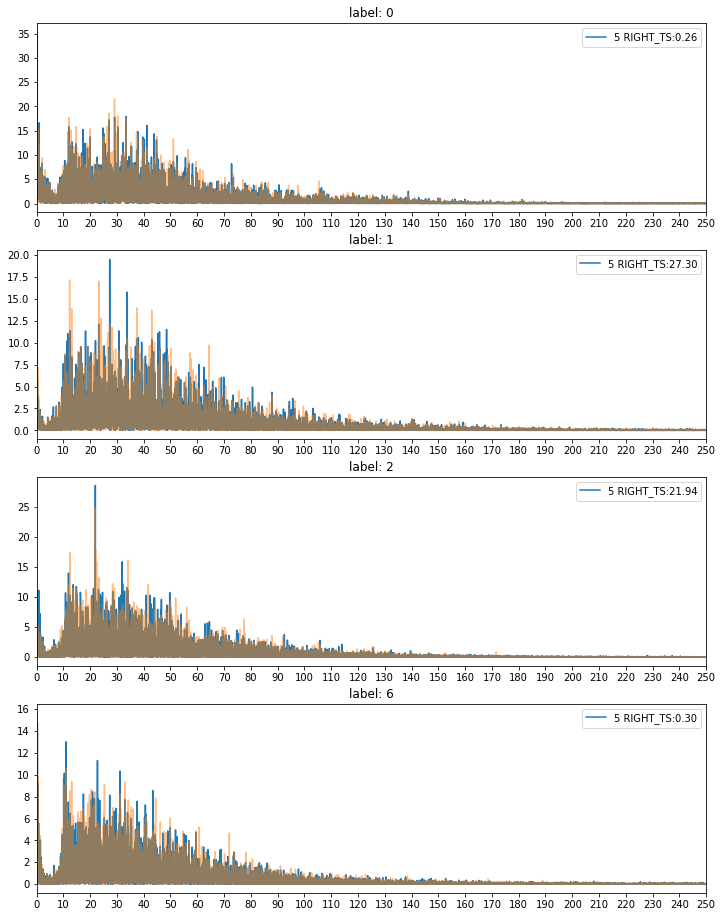

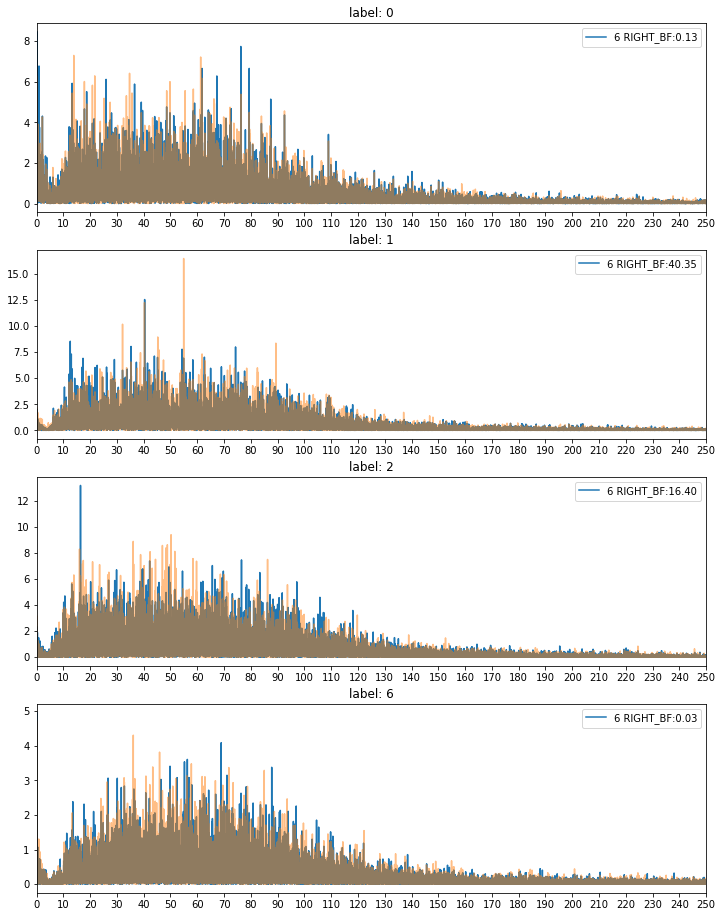

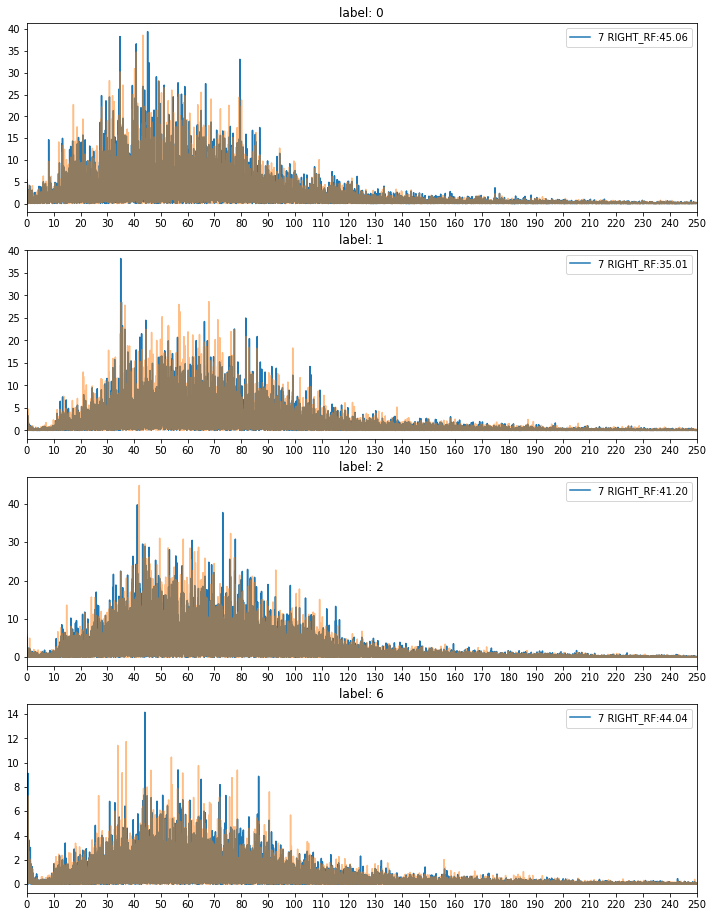

In [7]:
for i in range(8):
    plt.figure(figsize=(12,16))
    plt.title(data.columns[i+3])
    lab = 0
    for j in set(data.Label2):
        lab+=1
        ind = (data.Label2 == j) & (data.Label1 == j)
        ind3 = data.Label2 == j
        freqs,power = signal.periodogram(data.loc[ind,data.columns[3+i]],1e3)
        freqs2,power2 = signal.periodogram(data.loc[ind3,data.columns[3+i]],1e3)
        ind2 = np.argmax(power)
        
        plt.subplot(4,1,lab)
        
        plt.title('label: %d'%j)
        plt.plot(freqs,power)
        plt.plot(freqs2,power2,alpha=0.5)
        plt.xticks(np.arange(0,500,10))
        plt.xlim((0,250))
        plt.legend(labels=('%d %s:%0.2f'%(i,data.columns[i+3],freqs[ind2]),))

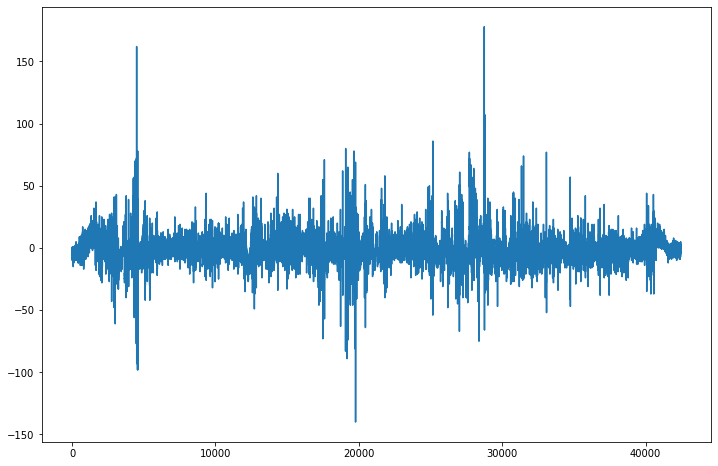

In [261]:
ind = data.Label2 == 0
a = np.array(data.index[ind])
np.where(a[1:]-a[:-1]>1)
plt.figure(figsize=(12,8))
#data.loc[ind,'LEFT_TS'].plot()
plt.plot(np.array(data.loc[ind,'LEFT_TS']))
#a[5589]

(0, 250)

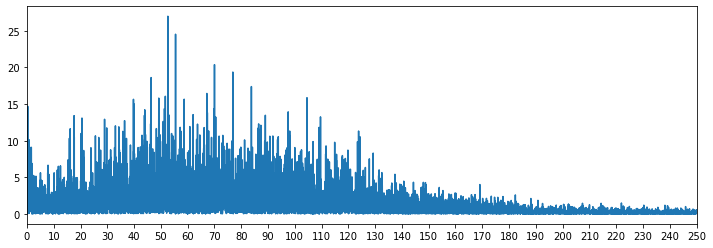

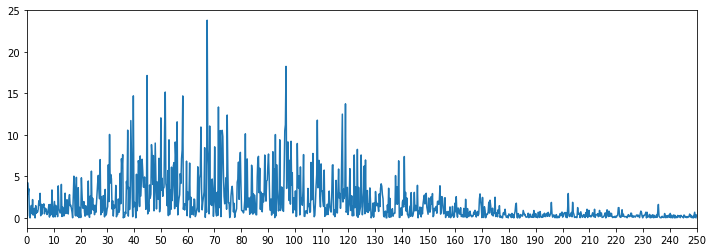

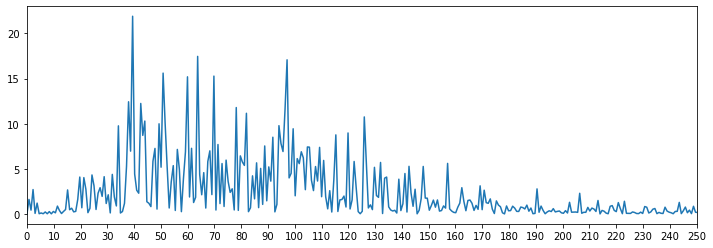

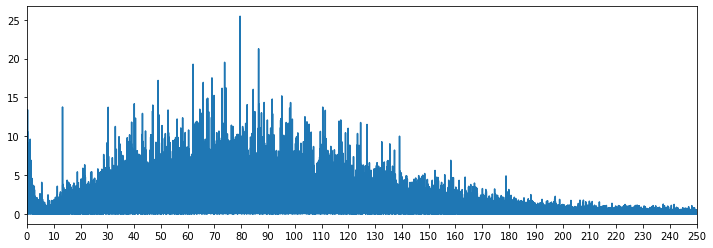

In [255]:
ind = data.Label2 == 0
a = np.array(data.index[ind])
plt.figure(figsize=(12,4))
#data.loc[ind,'LEFT_BF'].plot()
freqs,power = signal.periodogram(data.loc[ind,'LEFT_BF'],1e3)
plt.plot(freqs,power)
plt.xticks(np.arange(0,500,10))
plt.xlim((0,250))

plt.figure(figsize=(12,4))
freqs,power = signal.periodogram(data.iloc[:4280,2+3],1e3)
plt.plot(freqs,power)
plt.xticks(np.arange(0,500,10))
plt.xlim((0,250))

plt.figure(figsize=(12,4))
freqs,power = signal.periodogram(data.iloc[9681:10999,2+3],1e3)
plt.plot(freqs,power)
plt.xticks(np.arange(0,500,10))
plt.xlim((0,250))

plt.figure(figsize=(12,4))
freqs,power = signal.periodogram(data.iloc[15951:,2+3],1e3)
plt.plot(freqs,power)
plt.xticks(np.arange(0,500,10))
plt.xlim((0,250))

In [154]:
data.iloc[15952,2]

0

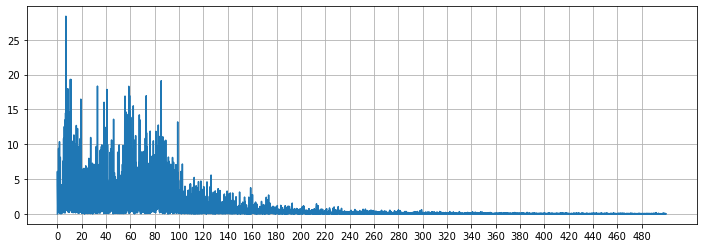

In [162]:
a = np.array(data.iloc[:4280,2+3])
b = np.array(data.iloc[9681:10999,2+3])
c = np.array(data.iloc[15951:,2+3])
d = np.concatenate([c])
freqs,power = signal.periodogram(d,1e3)
plt.figure(figsize=(12,4))
plt.plot(freqs,power)
plt.xticks(np.arange(0,500,20))
plt.grid(True)
#plt.xlim((0,250))
plt.savefig('./test.jpg')

In [194]:
df.columns

Index(['G04_FoG_trial_1_emg.csv', 'G04_FoG_trial_2_emg.csv',
       'G06_FoG_trial_1_emg.csv', 'G06_FoG_trial_2_emg.csv',
       'G06_FoG_trial_3_emg.csv', 'G07_Freezing_Trial1_trial_1_emg.csv',
       'G08_FoG_1_trial_1_emg.csv', 'G08_FoG_2_trial_1_emg.csv',
       'G11_FoG_trial_1_emg.csv', 'G11_FoG_trial_2_emg.csv',
       'P379_M050_2_OFF_A_FoG_trial_1_emg.csv',
       'P379_M050_2_OFF_A_FoG_trial_2_emg.csv',
       'P379_M050_2_OFF_A_FoG_trial_3_emg.csv',
       'P379_M050_2_OFF_B_FoG_trial_1_emg.csv',
       'P379_M050_2_OFF_B_FoG_trial_2_emg.csv',
       'P379_M050_2_OFF_B_FoG_trial_3_emg.csv',
       'P551_M050_2_A_FoG_trial_1_emg.csv',
       'P551_M050_2_B_FoG_trial_1_emg.csv',
       'P551_M050_2_B_FoG_trial_2_emg.csv',
       'P812_M050_2_B_FoG_trial_1_emg.csv',
       'P812_M050_2_B_FoG_trial_2_emg.csv'],
      dtype='object')

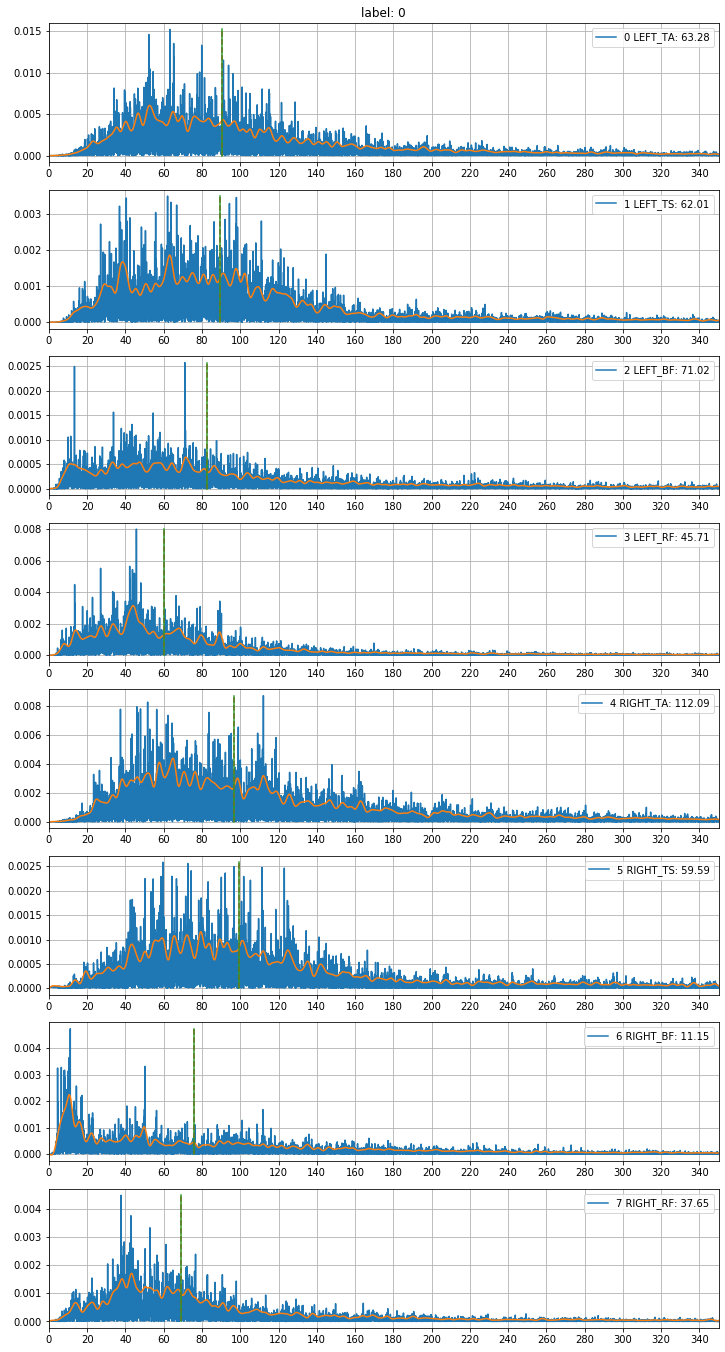

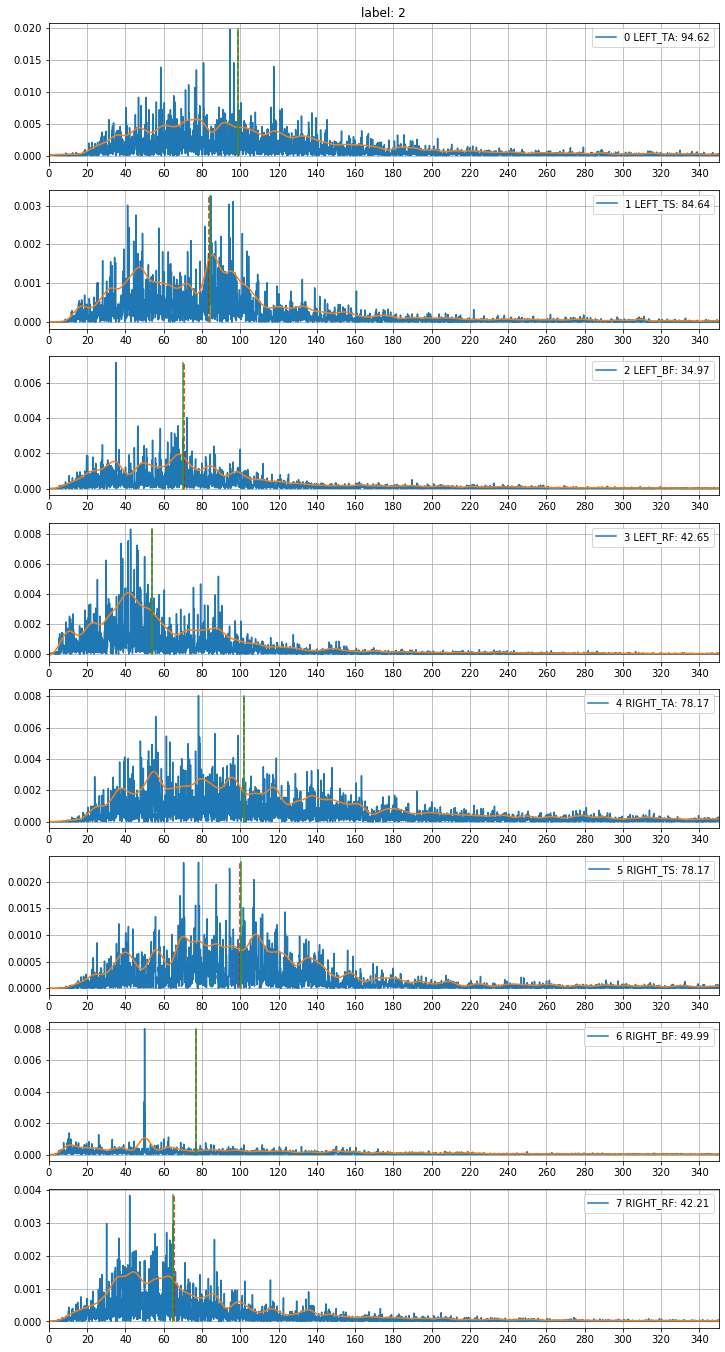

In [23]:
fn = 10
wn=2*fn/1000
b, a = signal.butter(4, wn, 'lowpass')
b1, a1 = signal.butter(1, wn, 'highpass')
length = len(df.columns)
for fi in np.arange(2,3):
    data = pd.read_csv('./data/'+df.columns[3])
    data = data.fillna({'LEFT_TA':data.LEFT_TA.mean(),
                           'LEFT_TS':data.LEFT_TS.mean(),
                           'LEFT_BF':data.LEFT_BF.mean(),
                           'LEFT_RF':data.LEFT_RF.mean(),
                           'RIGHT_TA':data.RIGHT_TA.mean(),
                           'RIGHT_TS':data.RIGHT_TS.mean(),
                           'RIGHT_BF':data.RIGHT_BF.mean(),
                           'RIGHT_RF':data.RIGHT_RF.mean()})
    #data = data.dropna().reset_index(drop=True)
    data.iloc[:,3:] = normalize(data.iloc[:,3:])
    for i in set(data.Label2):
        plt.figure(figsize=(12,24))
        #plt.title(data.columns[i+3])
        ind = data.Label2 == i
        plt.title('label: %d'%i)
        for j in range(8):

            freqs,power = signal.periodogram(signal.filtfilt(b1,a1,data.loc[ind,data.columns[3+j]]),1e3)            
            
            ind2 = np.argmax(power)
            power_filt = signal.filtfilt(b, a, power)*2
            
            total = cumtrapz(power_filt,freqs)
            w=np.where(total>=(total[-1]/2))[0][0]
            
            total2 = cumtrapz(power,freqs)
            w2=np.where(total2>=(total2[-1]/2))[0][0]            
            
            plt.subplot(8,1,j+1)
            if j == 0:
                plt.title('label: %d'%i)
            plt.plot(freqs,power)
            plt.plot(freqs,power_filt)
            plt.plot([freqs[w],freqs[w]],[0,power.max()],linestyle='--',color='r')
            plt.plot([freqs[w2],freqs[w2]],[0,power.max()],linestyle='-')
            plt.xticks(np.arange(0,500,20))
            plt.xlim((0,350))
            plt.grid(True)
            plt.legend(labels=('%d %s: %0.2f'%(j,data.columns[j+3],freqs[ind2]),))
        #plt.savefig('./pic/label_%d/'%i+df.columns[fi].split('.')[0]+'.jpg')
        #plt.close()

In [207]:
fn = 30
wn=2*fn/1000
b, a = signal.butter(4, wn, 'lowpass')
#x_filter = signal.filtfilt(b, a, x[1,:,1])

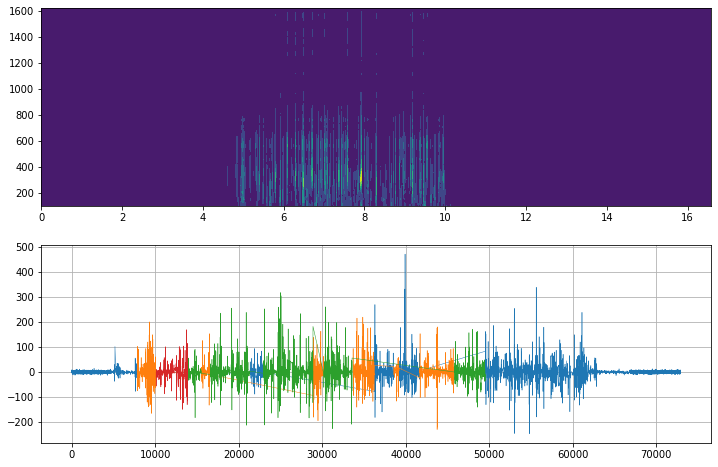

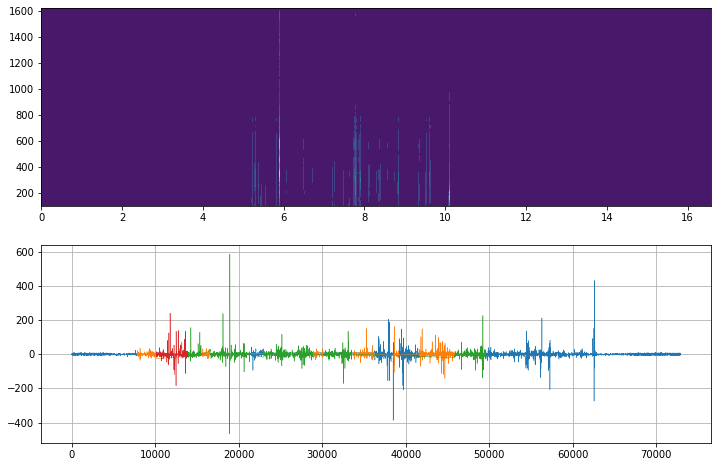

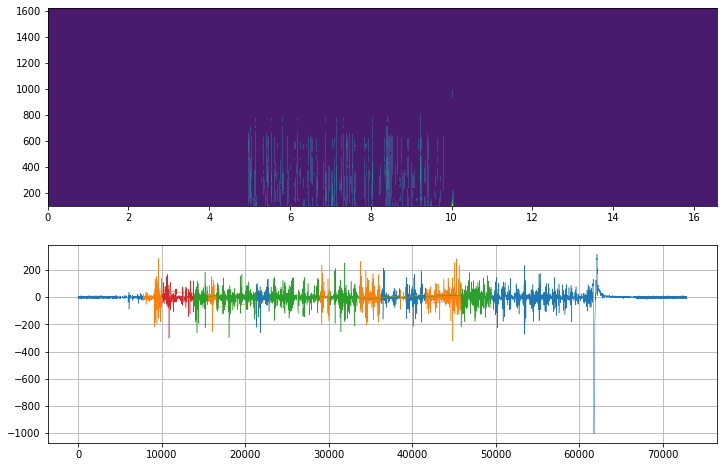

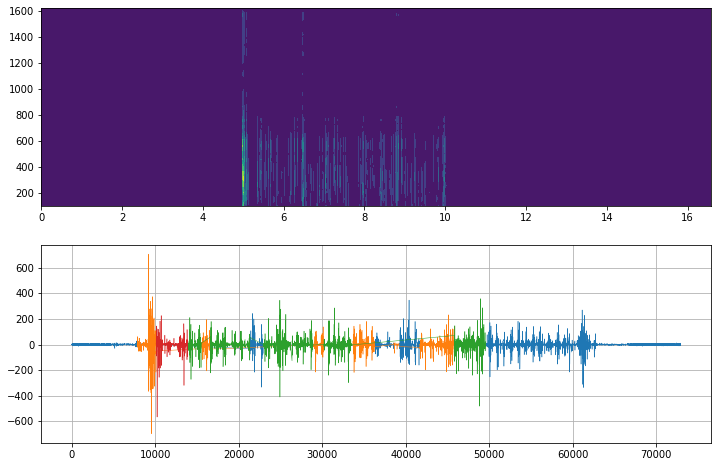

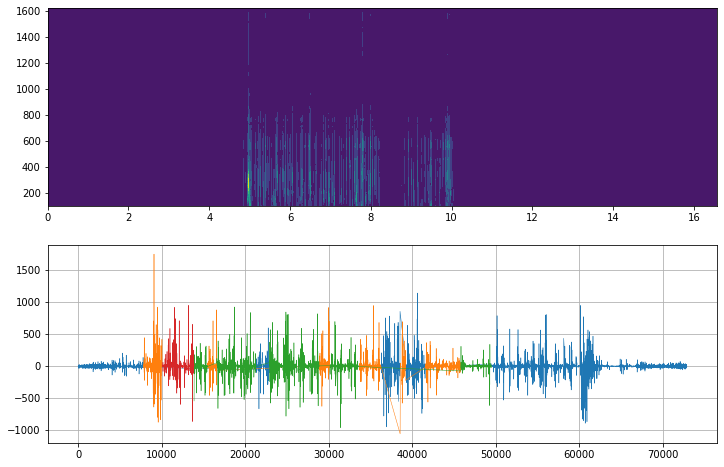

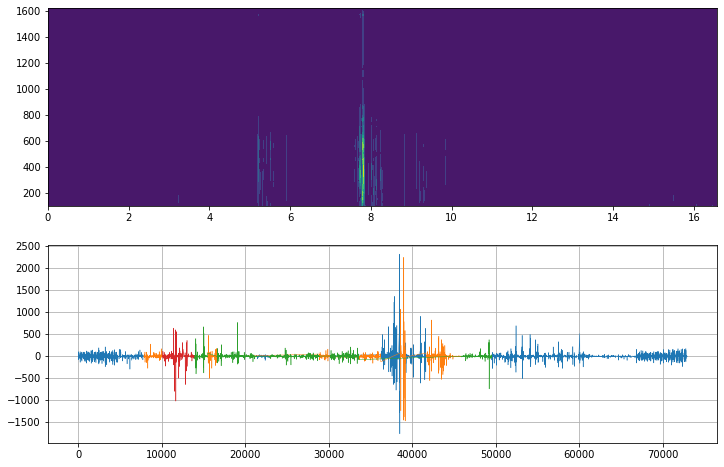

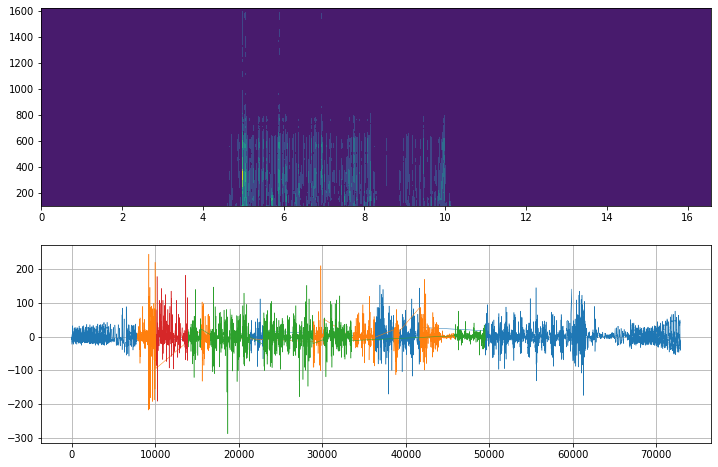

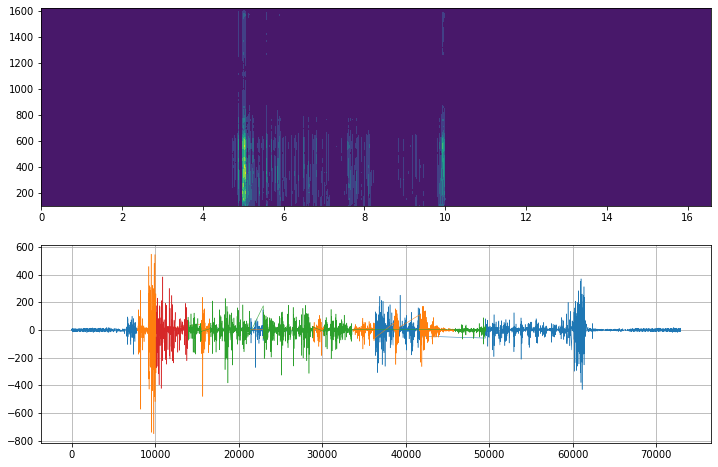

In [23]:
fc = pywt.central_frequency('mexh')
totalscal=32
cparam = 2 * fc * totalscal
scales = cparam / np.arange(totalscal, 1, -1)
t = np.arange(0,len(data)/1000,1e-3)

fn = 20
wn=2*fn/1000
b, a = signal.butter(4, wn, 'highpass')

for i in np.arange(3,11):
    plt.figure(figsize=(12,8))
    plt.subplot(2,1,1)
    #x_filter = signal.filtfilt(b,a,data.iloc[:,i])
    #data.loc[:,data.columns[i]].plot(linewidth=0.5)
    cwtmatr,f = pywt.cwt(data.loc[:,data.columns[i]],scales,'morl',1e-3)
    plt.contourf(t, f, abs(cwtmatr))
    plt.subplot(2,1,2)
    for j in set(data.Label2):
        ind = data.Label2 == j
        data.loc[ind,data.columns[i]].plot(linewidth=0.5)
        #sns.lineplot(data.Time[ind],x_filter[ind],linewidth=0.3)
        #plt.ylim((-200,200))
        #plt.xlim((0,160000))
        plt.grid(True)
    #print(freqs[np.argmax(power)])

In [24]:
x.shape

(44530, 256, 8)

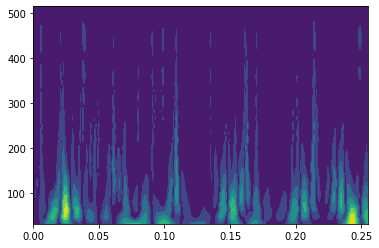

In [21]:
wave='mexh'
fc = pywt.central_frequency(wave)
totalscal=32
cparam = 2 * fc * totalscal
scales = cparam / np.arange(totalscal+1, 1, -1)
t = np.arange(0,0.256,1e-3)
cwtmatr,f = pywt.cwt(x[110,:,6],scales,wave,1e-3)
plt.contourf(t, f, abs(cwtmatr))

In [56]:
pywt.wavelist(kind='continuous')

['cgau1',
 'cgau2',
 'cgau3',
 'cgau4',
 'cgau5',
 'cgau6',
 'cgau7',
 'cgau8',
 'cmor',
 'fbsp',
 'gaus1',
 'gaus2',
 'gaus3',
 'gaus4',
 'gaus5',
 'gaus6',
 'gaus7',
 'gaus8',
 'mexh',
 'morl',
 'shan']

In [33]:
temp.shape

(2, 32, 256, 8)

In [41]:
temp=dp.generate_CWT_feature(x[100:102])

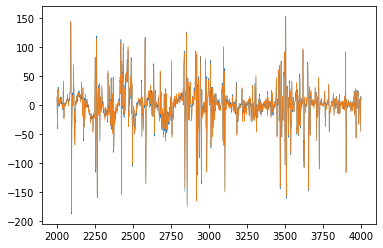

In [268]:
data.iloc[2000:4000,4].plot(linewidth=0.5)
plt.plot(np.arange(2000,4000),temp[2000:4000],alpha=0.9,linewidth=0.5)

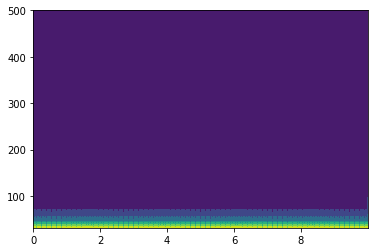

In [7]:
x = np.arange(0,10,0.001)
y = np.sin(2*np.pi*10*x)
fc = pywt.central_frequency('mexh')
totalscal=32
cparam = 2 * fc * totalscal
scales = cparam / np.arange(totalscal, 1, -1)
#plt.plot(y)
[cwtmatr, frequencies] = pywt.cwt(y,scales,'mexh',1e-3)
plt.contourf(x, frequencies, abs(cwtmatr))

In [13]:
f

array([500.   , 484.375, 468.75 , 453.125, 437.5  , 421.875, 406.25 ,
       390.625, 375.   , 359.375, 343.75 , 328.125, 312.5  , 296.875,
       281.25 , 265.625, 250.   , 234.375, 218.75 , 203.125, 187.5  ,
       171.875, 156.25 , 140.625, 125.   , 109.375,  93.75 ,  78.125,
        62.5  ,  46.875,  31.25 ])

11


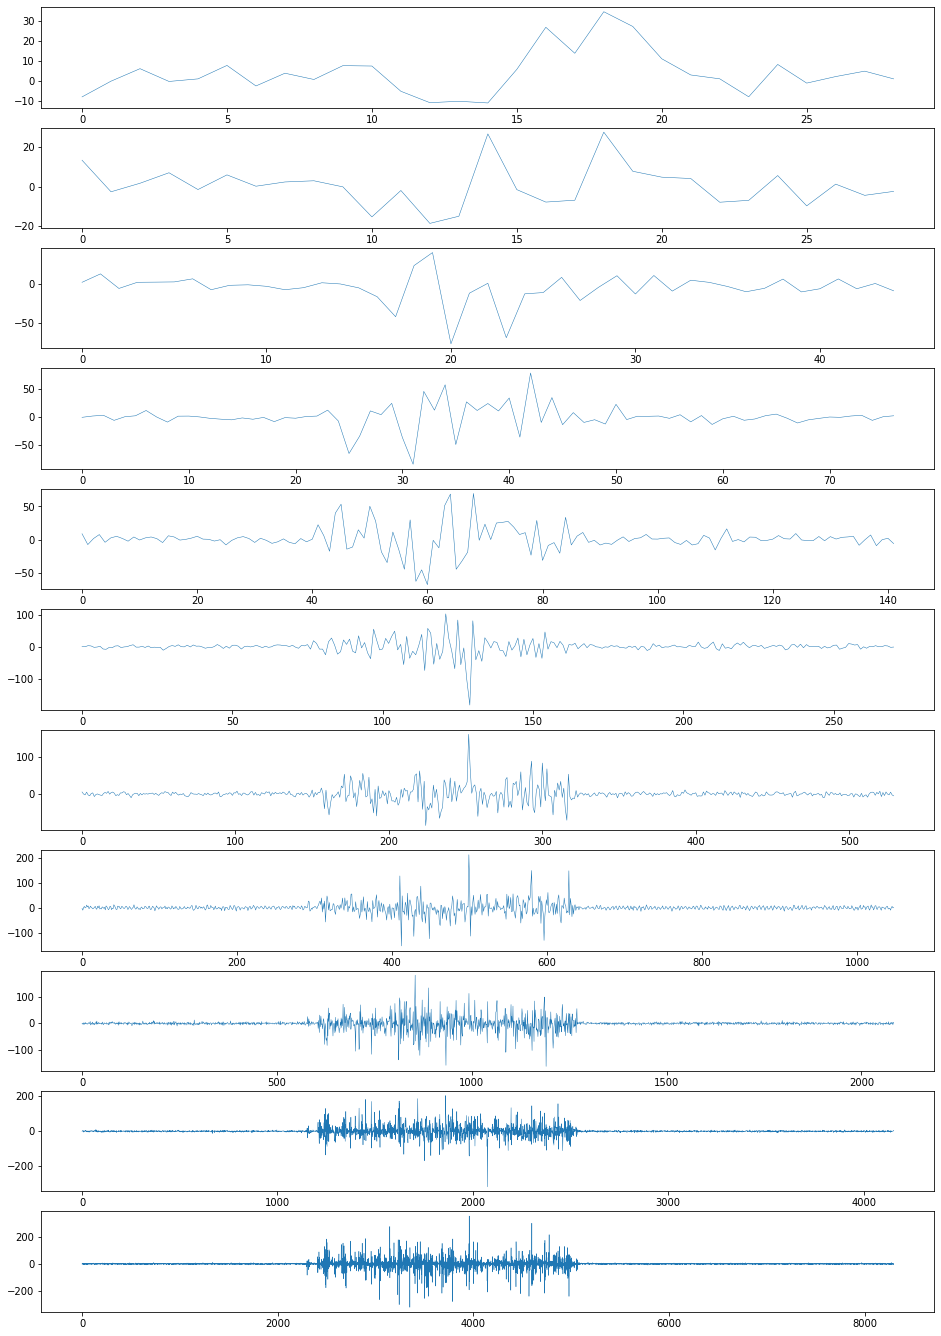

In [13]:
plt.figure(figsize=(16,24))
wa = pywt.wavedec(data.iloc[:,3],'db7',4,level=None)
j = 0
for i in wa:
    j += 1
    plt.subplot(len(wa),1,j)
    plt.plot(i,linewidth=0.5)
print(len(wa)) 

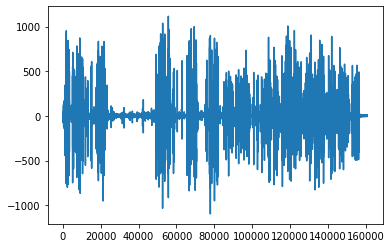

In [46]:
data.iloc[:,3].plot()

In [117]:
#for i in range(len(scs)):
#    joblib.dump(scs[i], './model/scalar%d'%i)
joblib.dump(sc, './model/scalar')

['./model/scalar']

In [15]:
data.isna().sum()

Time        0
Label1      0
Label2      0
LEFT_TA     0
LEFT_TS     0
LEFT_BF     0
LEFT_RF     0
RIGHT_TA    0
RIGHT_TS    0
RIGHT_BF    0
RIGHT_RF    0
dtype: int64

In [173]:
width = 1024
stride = 256
widths_scale = 32
x,y = dp.generate_window_slide_data(data,width,stride,scaler=True)

In [78]:
import time
import sys

In [96]:
start = time.time()
cwtmatr = generate_CWT_feature(x,widths_scale)
end = time.time()
duration = end-start
print('duration: %f'%(duration))

duration: 57.133043


In [ ]:
import h5py

file = './processed data/P812_trial_1_W%d_S%d_WS%d_CWT.hdf5'%(width,stride,widths_scale)
#with h5py.File(file,'w') as f:
#    f.create_dataset('cwt_data',data=cwtmatr)
#    f.create_dataset('label2',data=y)
    
with h5py.File(file,'r') as f:
    cwtmatr = f['cwt_data'][...]
    y = f['label2'][...]

In [20]:
dp.compute_AR(x).shape

(2196, 8)

1


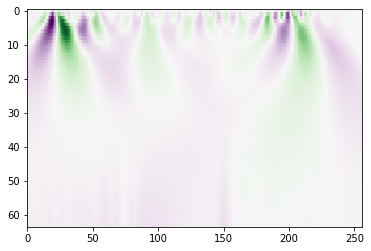

In [98]:
temp = 650
plt.imshow(cwtmatr[temp,:,:,0], cmap='PRGn', aspect='auto',
           vmax=abs(cwtmatr[temp,:,:,0]).max(), 
           vmin=-abs(cwtmatr[temp,:,:,0]).max())
print(y[temp])

In [94]:
print('max: %f'%(cwtmatr.max()))

max: 10774.616683


In [93]:
sys.getsizeof(cwtmatr)

4601151632

In [20]:
path = './processed data/data_set_after_window.hdf5'
with h5py.File(path,'r') as f:
    x = f['cwt_data'][...]
    y = f['label2'][...]

In [22]:
x.shape

(44530, 256, 8)

In [4]:
feature = dp.generate_feature(x)

In [5]:
ind = (y==2)

In [8]:
ind2 = (y==0)

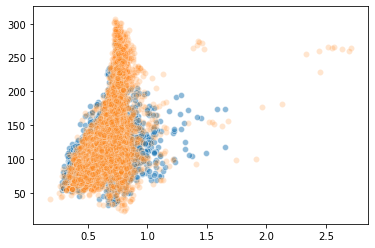

In [45]:
f1 = 8
f2 = 40
sns.scatterplot(feature[ind,f1],feature[ind,f2],alpha=0.5)
sns.scatterplot(feature[ind2,f1],feature[ind2,f2],alpha=0.2)

In [28]:
a = np.array([1,2,3,4])
ak,sig = autoregressive.AR_est_YW(a,3)

In [29]:
a[:3]@ak+sig

4.373102815177478

In [30]:
dwt = pywt.wavedec(x[1,:,1],wavelet='db7',level=3)

In [56]:
temp = np.array(dwt[0])
for i in range(len(dwt)-1):
    temp = np.concatenate([temp,np.array(dwt[i+1])])
l=0
for i in dwt:
    l+=len(i)
    print(len(i))

43
43
73
134


In [57]:
len(temp)

293

In [82]:
np.clip(np.random.randint(-5,5,(3,3)),0,4)

array([[0, 2, 0],
       [0, 3, 4],
       [3, 0, 0]])

In [21]:
def featureZC(data, threshold=10e-7):
    numOfZC = []
    channel = data.shape[1]
    length  = data.shape[0]
    
    for i in range(channel):
        count = 0
        for j in range(1,length):
            diff = data[j,i] - data[j-1,i]
            mult = data[j,i] * data[j-1,i]
            
            if np.abs(diff)>threshold and mult<0:
                count=count+1
        numOfZC.append(count)
    return np.array(numOfZC)

In [26]:
featureZC(x[0,:,:])

array([40, 43, 31, 52, 44, 76, 55, 62])

In [25]:
dp.compute_ZC(x,1e-7)[0,:]

array([ 73,  86,  39,  96,  95, 120, 110, 111])

In [26]:
a=[]
b=np.random.randint(0,10,(3,3,3))
c=np.random.randint(0,10,(3,3,3))
len(np.array(c.tolist() + b.tolist()))

6

In [18]:
a=pd.read_csv('./index_wrong_predict_ann.csv')
c=pd.read_csv('./index_wrong_predict_cnn.csv')

In [ ]:
(pd.concat([a,c],axis=0).iloc[:,0].value_counts()==2).value_counts()


In [135]:
def detrend(signal, Lambda):
    """detrend(signal, Lambda) -> filtered_signal
  
    This function applies a detrending filter.
   
    This code is based on the following article "An advanced detrending method with application
    to HRV analysis". Tarvainen et al., IEEE Trans on Biomedical Engineering, 2002.
  
    **Parameters**

    ``signal`` (1d numpy array):
    The signal where you want to remove the trend.

    ``Lambda`` (int):
    The smoothing parameter.

    **Returns**
  
    ``filtered_signal`` (1d numpy array):
    The detrended signal.
    """
    signal_length = signal.shape[0]

    # observation matrix
    H = np.identity(signal_length) 

    # second-order difference matrix
    from scipy.sparse import spdiags
    ones = np.ones(signal_length)
    minus_twos = -2*np.ones(signal_length)
    diags_data = np.array([ones, minus_twos, ones])
    diags_index = np.array([0, 1, 2])
    D = spdiags(diags_data, diags_index, (signal_length-2), signal_length).toarray()
    filtered_signal = (H - np.linalg.inv(H + (Lambda**2) * D.T@D))@signal
    trend = (np.linalg.inv(H + (Lambda**2) * D.T@D))@signal
    return filtered_signal,trend

In [140]:
#temp=sc.fit_transform(np.array(data.loc[:,data.columns[4]]).reshape(1,-1))[0,:]
temp=data.loc[:,data.columns[4]]
#temp_td,trend=detrend(temp[:15000],200)
trend_con = np.zeros((0,))
temp_con = np.zeros((0,))
length = 1000
for i in range(np.ceil(len(temp)/length).astype('int')):
    #print(temp[i*length:(i+1)*length].shape)
    temp_tdt,trend_t=detrend(temp[i*length:(i+1)*length],50)
    trend_con = np.concatenate([trend_con,trend_t])
    temp_con = np.concatenate([temp_con,temp_tdt])

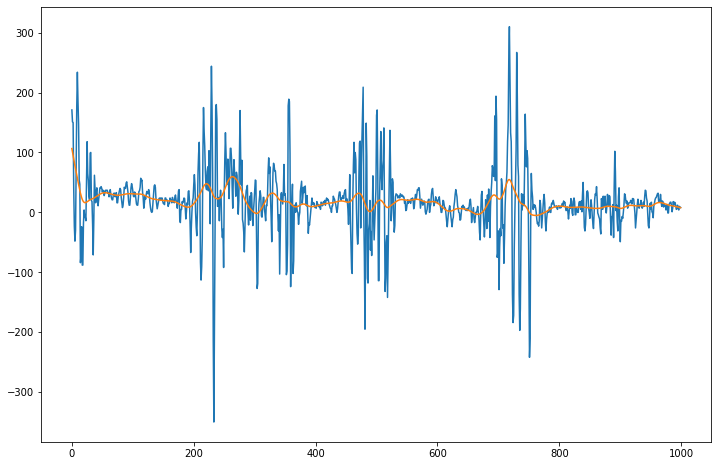

In [141]:
plt.figure(figsize=(12,8))
plt.plot(np.array(temp[3000:4000]))
plt.plot(trend_con[3000:4000])
#plt.ylim([-500,500])

In [146]:
temp=normalize(np.array(data.loc[:,data.columns[4]:]),axis=0)

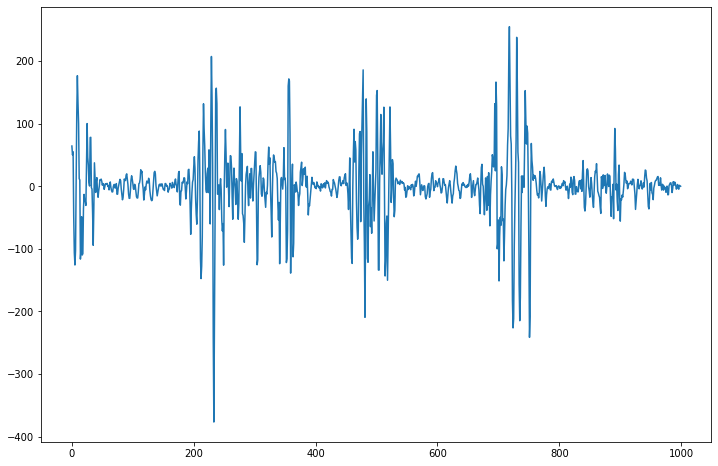

In [147]:
plt.figure(figsize=(12,8))
#plt.plot(temp[:,2])
plt.plot(np.array(temp_con[3000:4000]))
#plt.ylim([-500,500])

(0, 5)

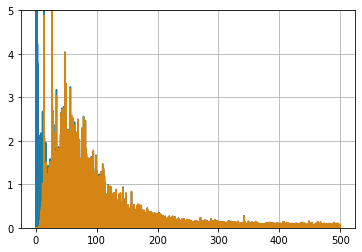

In [203]:
fn = 5
wn=2*fn/1000
b, a = signal.butter(4, wn, 'highpass')
x_filter = signal.filtfilt(b,a,temp)

freqs,power = signal.periodogram(temp,1e3)
freqs2,power2 = signal.periodogram(temp_con,1e3)
freqs3,power3 = signal.periodogram(x_filter,1e3)
plt.plot(freqs,power)
plt.plot(freqs2,power2,alpha=1)
plt.plot(freqs3,power3,alpha=0.2)
plt.grid(True)
plt.ylim((0,5))

In [45]:
temp.shape

(25322,)

In [62]:
np.ceil(2.1).astype('int')

3

In [103]:
length = 1000
lamb = 100
for file in df.columns[2:]:
    data = pd.read_csv('./data/'+file)
    data = data.dropna()
    
    trend_con = np.zeros((0,))
    temp_con = np.zeros((0,))
    m = 0
    total = np.ceil(len(data)/length).astype('int')
    for col in data.columns[3:]:
        #trend_con = np.zeros((0,))
        temp_con = np.zeros((0,))
        for i in range(total):
            temp = data.loc[:,col]
            temp_tdt,_=detrend(temp[i*length:(i+1)*length],lamb)
            #trend_con = np.concatenate([trend_con,trend_t])
            temp_con = np.concatenate([temp_con,temp_tdt])
            
            if m+1 == total*8:
                percent = 100.0
                print('%s [%d/%d]'%(str(percent)+'%',m+1,total*8),end='\n')
            else:
                percent = round(1.0 * m / total/8 * 100,2)
                print('%s [%d/%d]'%(str(percent)+'%',m+1,total*8),end='\r')
            m += 1
        data.loc[:,col] = temp_con
    data.to_csv('./data/detrend/detrend_%d_'%lamb+file,index=False)

100.0% [288/288]
100.0% [256/256]
100.0% [248/248]
100.0% [1280/1280]
100.0% [1808/1808]
100.0% [2904/2904]
100.0% [232/232]
100.0% [168/168]
100.0% [208/208]
100.0% [200/200]
100.0% [176/176]
100.0% [224/224]
100.0% [224/224]
100.0% [208/208]
100.0% [216/216]
100.0% [720/720]
100.0% [568/568]
100.0% [640/640]
100.0% [592/592]


In [140]:
data

Time  Label1  Label2  LEFT_TA  LEFT_TS  LEFT_BF  LEFT_RF  RIGHT_TA  \
0       0.000       0       0     -1.0      1.0    -11.0       -4         2   
1       0.001       0       0      3.0     -2.0     20.0        0        -1   
2       0.002       0       0      2.0      0.0      8.0        0        -1   
3       0.003       0       0     -3.0      0.0     15.0       -2        -2   
4       0.004       0       0      3.0      0.0      9.0        0        -2   
...       ...     ...     ...      ...      ...      ...      ...       ...   
35125  35.125       0       0     -2.0     -1.0      0.0       -2         4   
35126  35.126       0       0     -7.0     -1.0      0.0       -9         3   
35127  35.127       0       0    -11.0      2.0      2.0       -5         0   
35128  35.128       0       0    -12.0      1.0      0.0       -4         3   
35129  35.129       0       0     -2.0    -10.0      0.0       -2         0   

       RIGHT_TS  RIGHT_BF  RIGHT_RF  
0           2.0         0         0  
1           0.0         0         6  
2           2.0        -1         7  
3           5.0        -3         0  
4          -5.0        -3        -2  
...         ...       ...       ...  
35125       2.0        -2         4  
35126      -3.0         1        16  
35127       1.0        -3        20  
35128       2.0        -6        19  
35129      11.0         0        12  

[35121 rows x 11 columns]

In [93]:
#from nolds import sampen, corr_dim, dfa
from scipy.stats import kurtosis
from sklearn.linear_model import RANSACRegressor
#from corr_dim import *
import measures
import imp
imp.reload(corr_dim)

NameError: name 'corr_dim' is not defined

In [47]:
import math
from statsmodels.tsa.tsatools import lagmat
from sklearn.metrics.pairwise import euclidean_distances as dist
from mpl_toolkits.mplot3d import Axes3D

def Dim_Corr(datas, Tao, m, graph=False): 
    """
    Compute the correlation dimension of a time series with a time-lag Tao and an embedding dimension m
    datas--> time series to compute the correlation dimension
    Tao--> time lag computed using the first zero crossing of the auto-correlation function (see Tao func)   
    m--> embeding dimension of the time-series, computed using the false neighbors method (see fnn func)  
    graph (optional)--> plot the phase space (attractor) in 3D
    """
    x=corr_dim.PhaseSpace(datas, m, Tao, graph)
    ED2=dist(x.T)
    print(ED2.shape)
    posD=np.triu_indices_from(ED2, k=1)
    ED=ED2[posD]
    max_eps=np.max(ED)
    min_eps=np.min(ED[np.where(ED>0)])
    max_eps=np.exp(math.floor(np.log(max_eps)))
    n_div=int(math.floor(np.log(max_eps/min_eps)))
    n_eps=n_div+1
    eps_vec=range(n_eps)
    unos=np.ones([len(eps_vec)])*-1
    eps_vec1=max_eps*np.exp(unos*eps_vec-unos)
    Npairs=((len(x[1,:]))*((len(x[1,:])-1)))
    C_eps=np.zeros(n_eps)
 
    for i in eps_vec:
            eps=eps_vec1[i]
            N=np.where(((ED<eps) & (ED>0)))
            S=len(N[0])
            C_eps[i]=float(S)/Npairs

    omit_pts=1 
    k1=omit_pts
    k2=n_eps-omit_pts
    xd=np.log(eps_vec1)
    yd=np.log(C_eps)
    xp=xd[k1:k2]
    yp=yd[k1:k2]
    print(k2.shape)
    p = np.polyfit(xp, yp, 1)
    return p[0]

In [293]:
#plt.plot(x[1,:,2])
#corr_dim(x[1,:,2].reshape(-1,1),emb_dim=2,debug_plot =True)
tau = corr_dim.Tao(x[100,:,1])
m = corr_dim.fnn(x[100,:,1],200)
measures.corr_dim(x[100,:,1], emb_dim=5, lag=4,debug_plot=True)
#corr_dim.Dim_Corr(x[1,:,2],20,1,True)

ZeroDivisionError: float division by zero

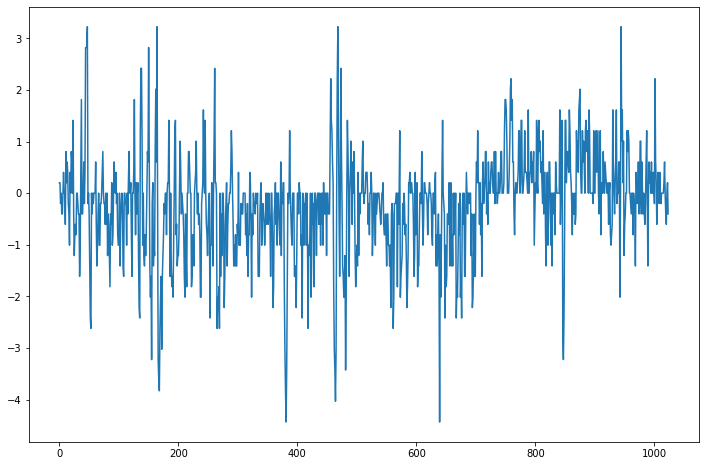

In [175]:
plt.figure(figsize=(12,8))
plt.plot(x[100,:,1])
#plt.ylim((-5,5))

In [139]:
data1 = x[1,:,2]
ld=len(data1)
m=20
Tao=5
xx = np.zeros([(ld-(m-1)*Tao),m])
for j in range(ld-(m-1)*Tao):
    #print(j)
    l1=(j)
    l2=(j+m*Tao)
    ind = np.arange(l1,l2,Tao)
    #print(ind)
    xx[j,:]=data1[ind]

In [123]:
ED2=dist(xx)
posD=np.triu_indices_from(ED2, k=1)
ED=ED2[posD]

In [140]:
ED2

array([[0.        , 4.24526665, 5.34781054, ..., 5.46366098, 6.69938521,
        6.18075125],
       [4.24526665, 0.        , 5.24931571, ..., 5.39315923, 6.47222107,
        7.5721411 ],
       [5.34781054, 5.24931571, 0.        , ..., 4.93502235, 5.68216823,
        6.95920631],
       ...,
       [5.46366098, 5.39315923, 4.93502235, ..., 0.        , 2.53016596,
        5.01890952],
       [6.69938521, 6.47222107, 5.68216823, ..., 2.53016596, 0.        ,
        5.91026481],
       [6.18075125, 7.5721411 , 6.95920631, ..., 5.01890952, 5.91026481,
        0.        ]])

In [135]:
for i in np.linspace(-4,4,11):
    dp.compute_ZC(x,i)

In [131]:
a=np.ones((4,4))
posa=np.triu_indices_from(a, k=1)

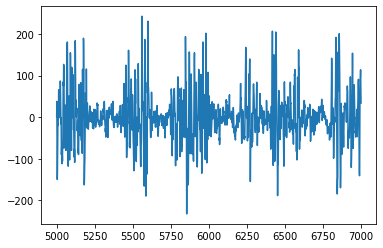

In [275]:
temp = 

In [150]:
temp=dp.compute_ZC_expand(x,np.linspace(-4,4,11))

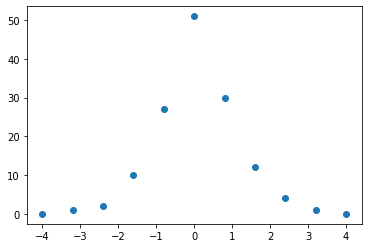

In [71]:
plt.scatter(np.linspace(-4,4,11),temp[500,:,1])

In [96]:
kurtosis(x,1)[1]

array([17.327394  ,  0.10140419, 17.282206  ,  3.3641987 ,  2.4409513 ,
       -0.28884864,  0.8528781 ,  3.6348338 ], dtype=float32)

In [98]:
kurtosis(x[1,:,0])

17.327381134033203